In [ ]:
import numpy as np

def gaussian_elimination(A, b):
    A = A.astype(float)  # Mengonversi matriks A menjadi float64
    b = b.astype(float)  # Mengonversi vektor b menjadi float64
    n = len(b)
    # Langkah Eliminasi
    for k in range(n-1):
        # Pengecekan elemen diagonal utama
        if A[k, k] == 0:
            # Cari baris lain dengan elemen non-nol di kolom k untuk ditukar
            for i in range(k+1, n):
                if A[i, k] != 0:
                    A[[k, i]] = A[[i, k]]  # Tukar baris
                    b[[k, i]] = b[[i, k]]
                    break
        # Hitung faktor pengali dan lakukan eliminasi
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            A[i, k+1:] -= m * A[k, k+1:]
            b[i] -= m * b[k]

    # Substitusi Mundur
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

# Contoh penggunaan
A = np.array([[1, 1, 0, 3],
              [2, 1, -1, 1],
              [3, -1, -1, 2],
              [-1, 2, 3, -1]])
b = np.array([4, 1, -3, 4])

x = gaussian_elimination(A, b)
print("Solusi x:", x)


Solusi x: [-1.  2.  0.  1.]


In [ ]:
import numpy as np

def partial_pivot(A, b):
    n = len(A)
    for k in range(n-1):
        max_index = np.argmax(abs(A[k:, k])) + k  # Cari indeks baris dengan elemen terbesar di kolom k
        if max_index != k:
            A[[k, max_index]] = A[[max_index, k]]  # Tukar baris k dengan baris max_index
            b[[k, max_index]] = b[[max_index, k]]
        for i in range(k+1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]  # Kurangi baris i dengan m kali baris k
            b[i] -= m * b[k]

def back_substitution(A, b):
    n = len(A)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):  # Mulai dari baris terakhir dan mundur
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

def gaussian_elimination(A, b):
    partial_pivot(A, b)
    return back_substitution(A, b)

# Contoh penggunaan
A = np.array([[0.003, 59.14], [5.291, -6.130]], dtype=float)
b = np.array([59.17, 46.78], dtype=float)

x = gaussian_elimination(A, b)
print("Solusi x:", x)

Solusi x: [10.  1.]


In [ ]:
import numpy as np

def scaled_partial_pivoting(A, b):
    n = len(b)
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(abs(A[i, :]))
    for k in range(n-1):
        # Pilih baris pivot berdasarkan skala relatif
        pivot_row = np.argmax(abs(A[k:, k]) / s[k:]) + k

        # Tukar baris jika perlu
        if pivot_row != k:
            A[[k, pivot_row]] = A[[pivot_row, k]]
            b[[k, pivot_row]] = b[[pivot_row, k]]
            s[[k, pivot_row]] = s[[pivot_row, k]]

        for i in range(k+1, n):
            # Lakukan eliminasi Gauss
            factor = A[i, k] / A[k, k]
            A[i, k+1:] -= factor * A[k, k+1:]
            b[i] -= factor * b[k]
    # Lakukan substitusi balik untuk mendapatkan solusi
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    return x

# Contoh penggunaan
A = np.array([[30, 591400], [5.291, -6.130]], dtype=float)
b = np.array([591700, 46.78], dtype=float)

x = scaled_partial_pivoting(A, b)
print("Solusi x:", x)

Solusi x: [10.  1.]


In [ ]:
import numpy as np

def LU_decomposition(A):
    n = len(A)
    L = np.eye(n)
    U = np.copy(A)

    for k in range(n-1):
        for i in range(k+1, n):
            if U[k, k] == 0:
                raise ValueError("Pivot nol ditemukan. Faktorisasi LU tidak dapat dilakukan.")
            L[i, k] = U[i, k] / U[k, k]
            for j in range(k, n):
                U[i, j] -= L[i, k] * U[k, j]

    return L, U

# Contoh penggunaan
A = np.array([[2, 6, -1, 0],
              [-1, 2, 8, -1],
              [0, -1, 2, 6],
              [0, 0, -1, 2]])

L, U = LU_decomposition(A)
print("Matriks L:")
print(L)
print("Matriks U:")
print(U)


Matriks L:
[[ 1.          0.          0.          0.        ]
 [-0.5         1.          0.          0.        ]
 [ 0.         -0.2         1.          0.        ]
 [ 0.          0.         -0.33333333  1.        ]]
Matriks U:
[[ 2  6 -1  0]
 [ 0  5  7 -1]
 [ 0  0  3  5]
 [ 0  0  0  3]]


In [ ]:
import numpy as np

def LDLT_decomposition(A):
    n = len(A)
    L = np.zeros((n, n))
    d = np.zeros(n)

    for i in range(n):
        d[i] = A[i][i] - np.sum(np.square(L[i][:i]) * d[:i])

        for j in range(i+1, n):
            L[j][i] = (A[j][i] - np.sum(L[j][:i] * L[i][:i] * d[:i])) / d[i]
        L[i][i] = 1

    return L, d

# Example usage:
A = np.array([[2, 4, 6],
              [4, 9, 14],
              [6, 14, 19]])

L, d = LDLT_decomposition(A)
print("Matriks segitiga bawah L:")
print(L)
print("Vektor diagonal d:")
print(d)

Matriks segitiga bawah L:
[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]
Vektor diagonal d:
[ 2.  1. -3.]


In [ ]:
import numpy as np

def cholesky_decomposition(A):
    n = len(A)
    G = np.zeros_like(A, dtype=float)

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                G[i][j] = np.sqrt(A[i][i] - np.sum(G[i][k]**2 for k in range(j)))
            else:
                G[i][j] = (A[i][j] - np.sum(G[i][k] * G[j][k] for k in range(j))) / G[j][j]

        if G[j][j] <= 0:
            print("Matrix is not positive definite.")
            return None

    return G

# Example usage:
A = np.array([[109614, 662],
              [662, 4]
            ])

G = cholesky_decomposition(A)
if G is not None:
    print("Lower triangular matrix G:")
    print(G)


Lower triangular matrix G:
[[3.31080051e+02 0.00000000e+00]
 [1.99951643e+00 4.39779435e-02]]


<ipython-input-1-0dd76dbcfc39>:10: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  G[i][j] = np.sqrt(A[i][i] - np.sum(G[i][k]**2 for k in range(j)))
<ipython-input-1-0dd76dbcfc39>:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  G[i][j] = (A[i][j] - np.sum(G[i][k] * G[j][k] for k in range(j))) / G[j][j]


In [ ]:
import numpy as np

def solve_LU_system(n, A):
    # Step 1
    L = np.zeros((n, n))
    U = np.eye(n)
    l11 = A[0, 0]
    u12 = A[0, 1] / l11
    z1 = A[0, -1] / l11

    # Step 2
    L[0, 0] = l11
    U[0, 1] = u12
    z = np.zeros(n)
    z[0] = z1
    for i in range(1, n-1):
        L[i, i-1] = A[i, i-1]
        L[i, i] = A[i, i] - L[i, i-1] * U[i-1, i]
        U[i, i+1] = A[i, i+1] / L[i, i]
        z[i] = (A[i, -1] - L[i, i-1] * z[i-1]) / L[i, i]

    # Step 3
    L[n-1, n-2] = A[n-1, n-2]
    L[n-1, n-1] = A[n-1, n-1] - L[n-1, n-2] * U[n-2, n-1]
    z[n-1] = (A[n-1, -1] - L[n-1, n-2] * z[n-2]) / L[n-1, n-1]

    # Step 4
    x = np.zeros(n)
    x[n-1] = z[n-1]

    # Step 5
    for i in range(n-2, -1, -1):
        x[i] = z[i] - U[i, i+1] * x[i+1]

    return x, L, U

# Contoh penggunaan
n = 4
A = np.array([[2, -1, 0, 0], [-1, 2, -1, 0], [0, -1, 2, -1], [0, 0, -1, 2]])
x, L, U = solve_LU_system(n, A)
print("Solusi x:", x)
print("Matriks L:")
print(L)
print("Matriks U:")
print(U)


Solusi x: [0. 0. 0. 1.]
Matriks L:
[[ 2.          0.          0.          0.        ]
 [-1.          1.5         0.          0.        ]
 [ 0.         -1.          1.33333333  0.        ]
 [ 0.          0.         -1.          1.25      ]]
Matriks U:
[[ 1.         -0.5         0.          0.        ]
 [ 0.          1.         -0.66666667  0.        ]
 [ 0.          0.          1.         -0.75      ]
 [ 0.          0.          0.          1.        ]]


In [ ]:
import numpy as np

def lu_factor_band(A, m_upper, m_lower):
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n, n))

    for i in range(n):
        lower = max(0, i - m_lower)
        upper = min(n, i + m_upper + 1)

        for j in range(lower, upper):
            s1 = sum(U[k, i] * L[j, k] for k in range(max(0, i - m_lower), i))
            U[j, i] = A[j, i] - s1

            if j > i:
                s2 = sum(U[k, j] * L[i, k] for k in range(max(0, j - m_lower), j))
                L[j, i] = (A[j, i] - s2) / U[i, i]

    return L, U

# Example usage
A = np.array([[2, 1, 0, 0],
              [1, 2, 1, 0],
              [0, 1, 2, 1],
              [0, 0, 1, 2]])

m_upper = 1
m_lower = 1

L, U = lu_factor_band(A, m_upper, m_lower)
print("Lower triangular matrix L:")
print(L)
print("Upper triangular matrix U:")
print(U)


Lower triangular matrix L:
[[1.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [0.         0.66666667 1.         0.        ]
 [0.         0.         0.75       1.        ]]
Upper triangular matrix U:
[[2.         1.         0.         0.        ]
 [1.         1.5        1.         0.        ]
 [0.         1.         1.33333333 1.        ]
 [0.         0.         1.         1.25      ]]


In [ ]:
import numpy as np

def LU_factorization_banded(A, upper_bandwidth, lower_bandwidth):
    n = len(A)
    L = np.eye(n)
    U = np.zeros((n, n))

    for i in range(n):
        for j in range(max(0, i - lower_bandwidth), i + 1):
            U[j, i] = A[j, i]
            for k in range(max(0, j - upper_bandwidth), j):
                U[j, i] -= L[j, k] * U[k, i]
        for j in range(i + 1, min(n, i + upper_bandwidth + 1)):
            L[j, i] = A[j, i]
            for k in range(max(0, i - lower_bandwidth), i):
                L[j, i] -= L[j, k] * U[k, i]
            L[j, i] /= U[i, i]

    return L, U

# Contoh matriks dengan lebar pita atas 2 dan lebar pita bawah 1
A = np.array([[2, -1, 6, 0],
              [-1, 2, -1, 8],
              [0, -1, 2, -1],
              [0, 0, -1, 2]])

# Faktorisasi LU
L, U = LU_factorization_banded(A, 2, 1)

print("Matriks L:")
print(L)
print("\nMatriks U:")
print(U)

Matriks L:
[[ 1.          0.          0.          0.        ]
 [-0.5         1.          0.          0.        ]
 [ 0.         -0.66666667  1.          0.        ]
 [ 0.          0.         -0.75        1.        ]]

Matriks U:
[[ 2.         -1.          0.          0.        ]
 [ 0.          1.5        -1.          0.        ]
 [ 0.          0.          1.33333333 -1.        ]
 [ 0.          0.          0.          1.25      ]]


In [ ]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve

# Definisikan matriks A
A = np.array([[2, -1, -1, 0],
              [-1, 2, -1, -1],
              [0, -1, 2, -1],
              [0, 0, -1, 2]])

# Faktorisasi LU
lu, piv = lu_factor(A)

print(lu)

[[ 2.         -1.         -1.          0.        ]
 [-0.5         1.5        -1.5        -1.        ]
 [ 0.         -0.66666667  1.         -1.66666667]
 [ 0.          0.         -1.          0.33333333]]


In [ ]:
import numpy as np

def gauss_seidel(A, b, XO, TOL, N):
    n = len(b)
    k = 1
    while k <= N:
        x = np.zeros(n)
        for i in range(n):
            x[i] = (1 / A[i, i]) * (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], XO[i+1:]))
        if np.linalg.norm(x - XO) < TOL:
            return x  # The procedure was successful.
        k += 1
        XO = np.copy(x)
    return "Maximum number of iterations exceeded"  # The procedure was unsuccessful.

# Example usage:
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]])
b = np.array([6, 25, -11, 15])
XO = np.array([0, 0, 0, 0])
TOL = 1e-3
N = 10

solution = gauss_seidel(A, b, XO, TOL, N)
print("Approximate solution:", solution)


Approximate solution: [ 1.00009128  2.00002134 -1.00003115  0.9999881 ]


In [ ]:
import numpy as np

def jacobi(A, b, XO, TOL, N):
    n = len(b)
    x = np.copy(XO)
    k = 1

    while k <= N:
        x_new = np.zeros_like(x)
        for i in range(n):
            sum_term = np.dot(A[i, :i], x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - sum_term) / A[i, i]

        if np.linalg.norm(x_new - x) < TOL:
            return x_new  # Solusi ditemukan
        else:
            k += 1
            x = np.copy(x_new)

    print("Jumlah iterasi maksimum telah terlampaui.")
    return None

# Contoh penggunaan:
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]])
b = np.array([6, 25, -11, 15])
XO = np.array([0, 0, 0, 0])
TOL = 1e-3
N = 10

solution = jacobi(A, b, XO, TOL, N)
if solution is not None:
    print("Solusi perkiraan:", solution)


Jumlah iterasi maksimum telah terlampaui.


In [ ]:
import numpy as np

def jacobi_iteration(A, b, X0, TOL, N):
    n = len(b)
    X = X0.copy()
    k=1
    for k in range(N):
        X_new = np.zeros(n)
        for i in range(n):
            sigma = sum([A[i, j] * X[j] for j in range(n) if j != i])
            X_new[i] = round((b[i] - sigma) / A[i, i],4)
        if np.linalg.norm(X_new - X, ord=2)/np.linalg.norm(X_new, ord=2) < TOL:
            return X_new
        X = X_new
    print("Maximum number of iterations exceeded")
    return X

# Example:
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]])
b = np.array([6, 25, -11, 15])
X0 = np.zeros_like(b)
TOL = 1e-3
N = 1000

solution = jacobi_iteration(A, b, X0, TOL, N)
print("Approximate solution:", solution)


Approximate solution: [ 1.0001  1.9998 -0.9998  0.9998]


In [ ]:
import numpy as np

def solve_linear_system(n, A, b, XO, TOL, N):
    k = 1
    while k <= N:
        x = np.zeros(n)
        for i in range(n):
            x[i] = round((b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], XO[i+1:])) / A[i, i],4)

        if np.linalg.norm(x - XO,ord=2)/np.linalg.norm(x, ord=2) < TOL:
            return x  # Jika solusi sudah mendekati XO dengan toleransi TOL, kembalikan solusi
        k += 1
        XO = x

    return "Jumlah iterasi maksimum telah terlampaui"

# Contoh penggunaan
n = len(b)
A = np.array([[10, -1, 2, 0], [-1, 11, -1, 3], [2, -1, 10, -1], [0, 3, -1, 8]])
b = np.array([6, 25, -11, 15])
XO = np.zeros(n)
TOL = 1e-3
N = 1000

solution = solve_linear_system(n, A, b, XO, TOL, N)
print("Solusi x:", solution)


In [ ]:
import numpy as np

def SOR(A, b, XO, ω, TOL, N):
    n = len(A)
    x = np.copy(XO)
    k = 1

    while k <= N:
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], XO[i+1:])
            x[i] = (1 - ω) * XO[i] + (ω / A[i, i]) * (b[i] - sum1 - sum2)

        if np.linalg.norm(x - XO) < TOL:
            return x  # The procedure was successful

        k += 1
        XO = np.copy(x)

    print('Maximum number of iterations exceeded')
    return None  # The procedure was unsuccessful

# Example usage:
A = np.array([[4, 3, 0],
              [3, 4, -1],
              [0, -1, 4]])
b = np.array([24, 30, -24])
XO = np.zeros_like(b)
ω = 1.25
TOL = 1e-7
N = 7

solution = SOR(A, b, XO, ω, TOL, N)
if solution is not None:
    print("Approximate solution:", solution)

Approximate solution: [ 3  4 -5]


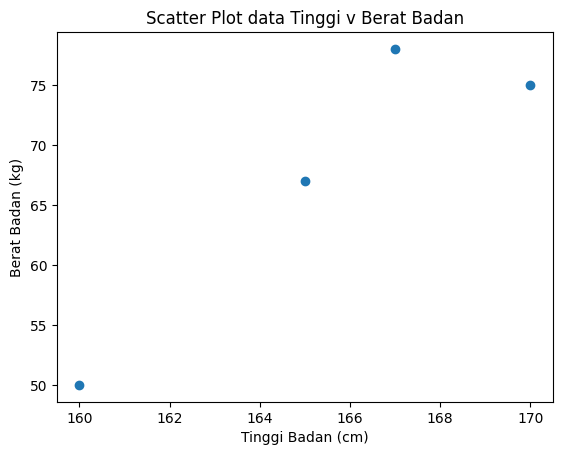

In [ ]:
import matplotlib.pyplot as plt

# Data
y = [75, 67, 78, 50]
x = [170, 165, 167, 160]

# Membuat scatter plot
plt.scatter(x, y)

# Menambahkan label dan judul
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.title('Scatter Plot data Tinggi v Berat Badan')

# Menampilkan plot
plt.show()

[79.85670000000005, 66.13070000000005, 71.62110000000001, 52.40470000000005]
[-4.856700000000046, 0.8692999999999529, 6.378899999999987, -2.404700000000048]
Eror 8.415234083494079


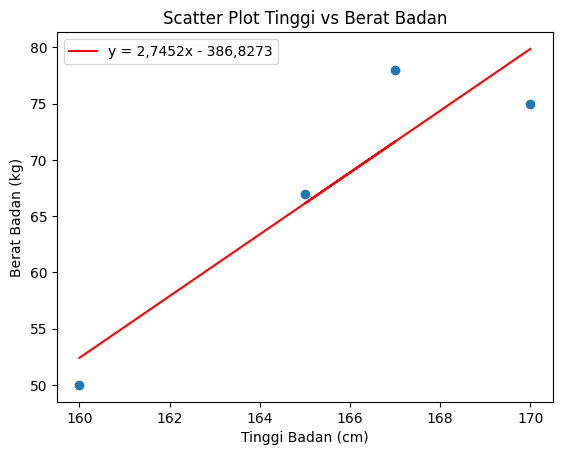

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
y = [75, 67, 78, 50]
x = [170, 165, 167, 160]
y_p = []
error = []
# Membuat scatter plot
plt.scatter(x, y)

# Menambahkan garis regresi linear
x_reg = np.array(x)
y_reg = 2.7452 * x_reg - 386.8273
plt.plot(x_reg, y_reg, color='red', label='y = 2,7452x - 386,8273')

i=0
for i in range(len(x)):
  y_pred = 2.7452 * x[i] - 386.8273
  y_p.append(y_pred)
  error.append(y[i]-y_pred)

RMSE = np.linalg.norm(error, ord=2)
print(y_p)
print(error)
print("Eror", RMSE)
# Menambahkan label dan judul
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.title('Scatter Plot Tinggi vs Berat Badan')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
import numpy as np

def qr_factorization(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j].copy()
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            v -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(v)
        Q[:, j] = v / R[j, j]

    return Q, R

# Contoh penggunaan
A = np.array([[1, -1, 4], [0, 1, -1], [1, 4, 2]])
Q, R = qr_factorization(A)
print("Matriks Q:")
print(Q)
print("Matriks R:")
print(R)


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [ ]:
import numpy as np

def householder_qr(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)

    for i in range(n):
        x = R[i:, i]
        e = np.zeros_like(x)
        e[0] = np.linalg.norm(x)
        u = x - e
        v = u / np.linalg.norm(u)

        R[i:, i:] -= 2 * np.outer(v, v.dot(R[i:, i:]))
        Q[:, i:] -= 2 * np.outer(Q[:, i:].dot(v), v)

    return Q, R

def least_squares(A, b):
    Q, R = householder_qr(A)
    y = Q.T.dot(b)
    x = np.linalg.solve(R[:A.shape[1]], y[:A.shape[1]])
    return x

# Contoh penggunaan
A = np.array([[170.0, 1.0], [165.0, 1.0], [167.0, 1.0], [160.0, 1.0]])
b = np.array([75.0, 67.0, 78.0, 50.0])

x = least_squares(A, b)
print("Solusi x:", x)


Solusi x: [   2.75471698 -388.40566038]


In [ ]:
import numpy as np

def givens_rotation(a, b):
    if b == 0:
        return np.sign(a), 0, abs(a)
    elif abs(b) > abs(a):
        tau = -a / b
        s = 1 / np.sqrt(1 + tau**2)
        c = s * tau
    else:
        tau = -b / a
        c = 1 / np.sqrt(1 + tau**2)
        s = c * tau
    return c, s, 0

def qr_givens(A):
    m, n = A.shape
    R = np.copy(A)
    Q = np.eye(m)
    for j in range(min(m-1, n)):
        for i in range(m-1, j, -1):
            if R[i, j] != 0:
                c, s, _ = givens_rotation(R[j, j], R[i, j])
                G = np.array([[c, -s], [s, c]])
                R[[j, i], j:] = np.dot(G, R[[j, i], j:])
                Q[:, [j, i]] = np.dot(Q[:, [j, i]], G.T)
    return Q.T, R

def solve_lstsq(A, b):
    Q, R = qr_givens(A)
    return np.linalg.lstsq(R[:A.shape[0], :], np.dot(Q.T, b), rcond=None)[0]

# Contoh data
A = np.array([[170.0, 1.0], [165.0, 1.0], [167.0, 1.0], [160.0, 1.0]])
b = np.array([75.0, 67.0, 78.0, 50.0])

# Solusi PKT
x = solve_lstsq(A, b)
print("Solusi PKT:", x)


Solusi PKT: [   10.57938033 -1739.77757378]


In [ ]:
from math import sin
def bisection(f, a, b, epsilon):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have different signs")

    while (b - a) / 2.0 > epsilon:
        c = (a + b) / 2.0
        if f(c) == 0:
            return c  # c is the root
        elif f(a) * f(c) < 0:
            b = c  # the root is in the left half
        else:
            a = c  # the root is in the right half

    return (a + b) / 2.0  # Return the midpoint as the root approximation

# Contoh penggunaan
def f(x):
    return (x**2 - 4*(sin(x)))

root = bisection(f, 1, 3, 1e-3)
print("Akar ditemukan pada:", root)

Akar ditemukan pada: 1.9345703125


In [ ]:
from math import sin

print((1.933594+1.935547)/2)
print(f(1.9345705))

1.9345705
0.0043205505358066


In [ ]:
from math import sin
def fixed_point(g, x0, epsilon, N):
    xk = x0
    for k in range(N):
        xk_next = g(xk)
        if abs(xk_next - xk) < epsilon:
            return xk_next
        xk = xk_next
    raise ValueError("Metode tidak konvergen setelah jumlah iterasi maksimum")

# Contoh penggunaan
def g(x):
    return ((2*x+3)**(1/2))

x0 = 0  # Tebakan awal
epsilon = 1e-6  # Toleransi kesalahan
N = 100  # Jumlah iterasi maksimum

root = fixed_point(g, x0, epsilon, N)
print("Akar ditemukan pada:", root)


Akar ditemukan pada: 0.876726429636934


In [ ]:
def fixed_point(g, x0, tol, max_iter):
    x_prev = x0
    print(f"Iterasi 0: x = {x_prev}")
    for i in range(1, max_iter + 1):
        x_next = g(x_prev)
        print(f"Iterasi {i}: x = {x_next}")
        print(f"eror {abs(x_next - x_prev)}:")
        if abs(x_next - x_prev) < tol:
            print("Konvergen")
            return x_next
        x_prev = x_next
    raise ValueError("Metode tidak konvergen dalam iterasi maksimum yang diberikan")

# Contoh penggunaan
g = lambda x: sin(x)/x  # Fungsi g(x) yang dipilih sesuai dengan bentuk x = g(x)
x0 = 0.75  # Perkiraan awal
tol = 1e-2  # Toleransi kesalahan
max_iter = 100  # Batas iterasi maksimum

root = fixed_point(g, x0, tol, max_iter)
print(f"Titik tetap yang ditemukan: {root}")

Iterasi 0: x = 0.75
Iterasi 1: x = 0.9088516800311122
eror 0.15885168003111216:
Iterasi 2: x = 0.8679066784393527
eror 0.04094500159175951:
Iterasi 3: x = 0.879100775473743
eror 0.011194097034390338:
Iterasi 4: x = 0.8760834331124451
eror 0.0030173423612979144:
Konvergen
Titik tetap yang ditemukan: 0.8760834331124451


In [ ]:
def bisection(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have different signs")

    iteration = 1

    while (b - a) / 2.0 > tol:
        c = (a + b) / 2.0
        fc = f(c)
        print(f"Iterasi {iteration}:")
        print(f"  a = {a}, b = {b}, c = {c}")
        print(f"  f(a) = {f(a)}, f(b) = {f(b)}, f(c) = {fc}")
        print(f" eror {abs((b - a) / 2.0)}:")
        if fc == 0:
            return c  # c is a root
        elif f(a) * fc < 0:
            b = c
        else:
            a = c
        iteration += 1

    c = (a + b) / 2.0
    print(f"Iterasi {iteration}:")
    print(f"  a = {a}, b = {b}, c = {c}")
    print(f"  f(a) = {f(a)}, f(b) = {f(b)}, f(c) = {f(c)}")
    print(f" eror {abs((b - a) / 2.0)}:")
    return c

# Contoh penggunaan
f = lambda x: x**2 - sin(x)
a = 0.5
b = 1
tol = 1e-2

root = bisection(f, a, b, tol)
print(f"Akar yang ditemukan: {root}")


Iterasi 1:
  a = 0.5, b = 1, c = 0.75
  f(a) = -0.229425538604203, f(b) = 0.1585290151921035, f(c) = -0.11913876002333412
 eror 0.25:
Iterasi 2:
  a = 0.75, b = 1, c = 0.875
  f(a) = -0.11913876002333412, f(b) = 0.1585290151921035, f(c) = -0.0019185022360270754
 eror 0.125:
Iterasi 3:
  a = 0.875, b = 1, c = 0.9375
  f(a) = -0.0019185022360270754, f(b) = 0.1585290151921035, f(c) = 0.07282514173930699
 eror 0.0625:
Iterasi 4:
  a = 0.875, b = 0.9375, c = 0.90625
  f(a) = -0.0019185022360270754, f(b) = 0.07282514173930699, f(c) = 0.03409241516805106
 eror 0.03125:
Iterasi 5:
  a = 0.875, b = 0.90625, c = 0.890625
  f(a) = -0.0019185022360270754, f(b) = 0.03409241516805106, f(c) = 0.015747912378999196
 eror 0.015625:
Iterasi 6:
  a = 0.875, b = 0.890625, c = 0.8828125
  f(a) = -0.0019185022360270754, f(b) = 0.015747912378999196, f(c) = 0.00683009435717552
 eror 0.0078125:
Akar yang ditemukan: 0.8828125


In [ ]:
from math import sin, cos

def newton_raphson(f, df, x0, tol, max_iter):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            print(f"Iterasi ke-{i}: Akar yang ditemukan: {x}")
            return x
        dfx = df(x)
        if dfx == 0:
            raise ValueError("Turunan fungsi adalah nol. Metode Newton-Raphson tidak dapat konvergen.")
        x = x - fx / dfx
        print(f"Iterasi ke-{i}: Perkiraan akar: {x}")
    raise ValueError("Metode Newton-Raphson tidak konvergen dalam jumlah iterasi maksimum yang ditentukan.")

# Contoh penggunaan
f = lambda x: x**2 - sin(x)
df = lambda x: 2*x - cos(x)
x0 = 0.75  # Tebakan awal
tol = 1e-3
max_iter = 100

root = newton_raphson(f, df, x0, tol, max_iter)
print(f"Akar yang ditemukan: {root}")


Iterasi ke-0: Perkiraan akar: 0.9050657737428616
Iterasi ke-1: Perkiraan akar: 0.8776625559476823
Iterasi ke-2: Perkiraan akar: 0.8767273027175759
Iterasi ke-3: Akar yang ditemukan: 0.8767273027175759
Akar yang ditemukan: 0.8767273027175759


In [ ]:
import numpy as np

def newton_raphson_system(F, J, x0, tol=1e-6, max_iter=100):
    """
    Metode Newton-Raphson untuk menyelesaikan sistem persamaan nonlinier.

    Parameters:
        F (function): Fungsi yang mengembalikan vektor fungsi yang ingin diselesaikan.
        J (function): Fungsi yang mengembalikan matriks Jacobian dari vektor fungsi F.
        x0 (numpy.ndarray): Tebakan awal untuk solusi sistem.
        tol (float): Toleransi untuk konvergensi.
        max_iter (int): Jumlah maksimum iterasi.

    Returns:
        numpy.ndarray: Solusi sistem persamaan nonlinier.
    """
    x = x0
    for i in range(max_iter):
        delta_x = np.linalg.solve(J(x), -F(x))
        x = x + delta_x
        if np.linalg.norm(delta_x) < tol:
            print(f"Konvergen pada iterasi ke-{i}.")
            return x
    raise ValueError("Metode Newton-Raphson tidak konvergen dalam jumlah iterasi maksimum yang ditentukan.")

# Contoh penggunaan
def F(x):
    return np.array([
        x[0]**2 + x[1]**2 - 1,
        x[0] - x[1]**2
    ])

def J(x):
    return np.array([
        [2*x[0], 2*x[1]],
        [1, -2*x[1]]
    ])

x0 = np.array([0.5, 0.5])  # Tebakan awal
sol = newton_raphson_system(F, J, x0)
print("Solusi sistem persamaan nonlinier:", sol)


Konvergen pada iterasi ke-4.
Solusi sistem persamaan nonlinier: [0.61803399 0.78615138]


In [ ]:
import numpy as np

def f(x):
    """Fungsi tujuan yang akan diminimalkan."""
    return 0.5*x[0]**2 + x[1]**2 + x[0]*x[1] - 3*x[0] - 4*x[1]

def grad_f(x):
    """Gradien (turunan pertama) dari fungsi tujuan."""
    return np.array([2*x[0] + x[1] - 3, 2*x[1] + x[0] - 4])

def line_search(f, grad_f, x, direction, alpha=1, rho=0.5, c=1e-4):
    """
    Backtracking line search untuk menemukan alpha_k.

    Parameters:
        f (function): Fungsi tujuan yang akan diminimalkan.
        grad_f (function): Gradien dari fungsi tujuan.
        x (numpy.ndarray): Titik saat ini.
        direction (numpy.ndarray): Arah pencarian.
        alpha (float): Ukuran langkah awal.
        rho (float): Faktor pengurangan ukuran langkah.
        c (float): Parameter untuk kondisi Armijo.

    Returns:
        float: Nilai optimal dari alpha_k.
    """
    while f(x + alpha * direction) > f(x) + c * alpha * np.dot(grad_f(x), direction):
        alpha *= rho
    return alpha

def gradient_descent(f, grad_f, x0, tol=1e-6, max_iter=1000):
    """
    Algoritma Gradient Descent dengan line search untuk menentukan alpha_k.

    Parameters:
        f (function): Fungsi tujuan yang akan diminimalkan.
        grad_f (function): Gradien dari fungsi tujuan.
        x0 (numpy.ndarray): Tebakan awal untuk solusi.
        tol (float): Toleransi untuk konvergensi.
        max_iter (int): Jumlah maksimum iterasi.

    Returns:
        numpy.ndarray: Solusi optimal.
    """
    x = x0
    for k in range(max_iter):
        grad = grad_f(x)
        direction = -grad
        alpha_k = line_search(f, grad_f, x, direction)
        x_new = x + alpha_k * direction
        if np.linalg.norm(grad_f(x_new)) < tol:
            print(f"Konvergen pada iterasi ke-{k}.")
            return x_new
        x = x_new
    raise ValueError("Gradient Descent tidak konvergen dalam jumlah iterasi maksimum yang ditentukan.")

# Contoh penggunaan
x0 = np.array([0.0, 0.0])  # Tebakan awal
sol = gradient_descent(f, grad_f, x0)
print("Solusi optimal:", sol)


Konvergen pada iterasi ke-22.
Solusi optimal: [0.66666687 1.66666675]


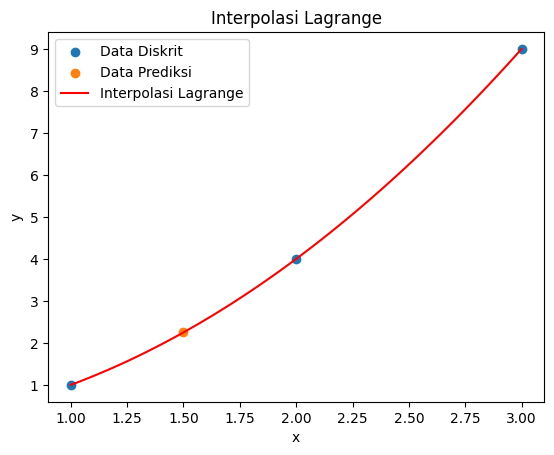

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_new):
    def basis_polynomial(i, x_point):
        terms = [(x_point - x[j]) / (x[i] - x[j]) for j in range(len(x)) if j != i]
        return np.prod(terms, axis=0)

    P_x_new = np.sum([y[i] * basis_polynomial(i, x_new) for i in range(len(x))], axis=0)
    return P_x_new

# Data diskrit
x = np.array([1, 2, 3])
y = np.array([1, 4, 9])
pred_x = []
pred_y = []

# Titik baru untuk evaluasi interpolasi
x_new = np.linspace(1, 3, 100)
y_new = lagrange_interpolation(x, y, x_new)
x_pred = 1.5 #Dapat diganti dengan suatu bilangan riil antara batas bawah dan batas atas dari x
y_pred = lagrange_interpolation(x, y, x_pred)
pred_x.append(x_pred)
pred_y.append(y_pred)
# Plot
plt.scatter(x, y, label='Data Diskrit')
plt.scatter(pred_x, pred_y, label='Data Prediksi')
plt.plot(x_new, y_new, label='Interpolasi Lagrange', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Lagrange')
plt.show()


In [ ]:
import numpy as np

def second_central_difference(f, x, h=1e-5):
    """
    Menghitung turunan kedua dari fungsi f di titik x menggunakan metode selisih tengah.

    Parameters:
    f (function): Fungsi yang akan diturunkan.
    x (float): Titik di mana turunan dihitung.
    h (float): Langkah kecil. Default adalah 1e-5.

    Returns:
    float: Nilai pendekatan turunan kedua dari f di x.
    """
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Contoh penggunaan
# Misalkan kita ingin menghitung turunan kedua dari fungsi f(x) = sin(x) di x = pi/4
def func(x):
    return np.sin(x)

x = np.pi / 4
h = 1e-2

# Hitung turunan kedua
turunan_kedua = second_central_difference(func, x, h)

print(f"Turunan kedua dari sin(x) di x = pi/4 adalah sekitar {turunan_kedua:.2f}")
print(func(x - h))
print(func(x + h))
print(func(x))

Turunan kedua dari sin(x) di x = pi/4 adalah sekitar -0.71
0.7000004761807905
0.7141423761034396
0.7071067811865475


In [ ]:
import numpy as np

def left_rectangular_method(f, a, b, n):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan metode segi empat kiri.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    n (int): Jumlah subinterval.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """
    h = (b - a) / n
    integral = sum(f(a + i * h) for i in range(n))
    return h * integral

def midpoint_rectangular_method(f, a, b, n):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan metode segi empat tengah.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    n (int): Jumlah subinterval.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """
    h = (b - a) / n
    integral = sum(f(a + (i + 0.5) * h) for i in range(n))
    return h * integral

def right_rectangular_method(f, a, b, n):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan metode segi empat kanan.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    n (int): Jumlah subinterval.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """
    h = (b - a) / n
    integral = sum(f(a + (i + 1) * h) for i in range(n))
    return h * integral

# Contoh penggunaan
# Misalkan kita ingin menghitung integral dari fungsi f(x) = sin(x) di interval [0, pi]
def func(x):
    return np.sin(x)

a = 0
b = np.pi
n = 1000  # Jumlah subinterval

# Hitung integral menggunakan ketiga metode
integral_left = left_rectangular_method(func, a, b, n)
integral_midpoint = midpoint_rectangular_method(func, a, b, n)
integral_right = right_rectangular_method(func, a, b, n)

print(f"Metode segi empat kiri: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_left:.6f}")
print(f"Metode segi empat tengah: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_midpoint:.6f}")
print(f"Metode segi empat kanan: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_right:.6f}")


Metode segi empat kiri: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 1.999998
Metode segi empat tengah: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 2.000001
Metode segi empat kanan: Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 1.999998


In [ ]:
import numpy as np

def gauss_legendre_quadrature(f, a, b, n):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan Gauss-Legendre Quadrature.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    n (int): Jumlah titik Gauss (harus 2 atau 3).

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """
    # Titik dan bobot Gauss-Legendre untuk n = 2
    if n == 2:
        x = [-1/np.sqrt(3), 1/np.sqrt(3)]
        w = [1, 1]
    elif n == 3:
        x = [-np.sqrt(3/5), 0, np.sqrt(3/5)]
        w = [5/9, 8/9, 5/9]
    else:
        raise ValueError("Jumlah titik Gauss harus 2 atau 3.")

    # Perubahan variabel
    integral = 0.0
    for i in range(n):
        xi = 0.5 * ((b - a) * x[i] + (b + a))
        integral += w[i] * f(xi)

    integral *= 0.5 * (b - a)
    return integral

# Contoh penggunaan
# Misalkan kita ingin menghitung integral dari fungsi f(x) = sin(x) di interval [0, pi]
def func(x):
    return np.sin(x)

a = 0
b = np.pi
n = 2  # Jumlah titik Gauss

# Hitung integral
integral_value = gauss_legendre_quadrature(func, a, b, n)

print(f"Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_value:.6f}")


Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 1.935820


In [ ]:
def adaptive_simpsons(f, a, b, tol, max_recursion_depth=50):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan aturan Adaptive Simpson's Rule.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    tol (float): Toleransi kesalahan yang diizinkan.
    max_recursion_depth (int): Batas maksimal kedalaman rekursi untuk mencegah rekursi tak terbatas.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """

    def simpsons_rule(f, a, b):
        """ Menghitung integral menggunakan aturan Simpson biasa pada interval [a, b]. """
        c = (a + b) / 2.0
        h = (b - a) / 2.0
        return (h / 3.0) * (f(a) + 4.0 * f(c) + f(b))

    def adaptive_simpsons_recursive(f, a, b, tol, depth):
        """ Rekursi pada aturan Adaptive Simpson's Rule. """
        c = (a + b) / 2.0
        S = simpsons_rule(f, a, b)
        S1 = simpsons_rule(f, a, c)
        S2 = simpsons_rule(f, c, b)
        E = (S1 + S2 - S) / 15.0
        if abs(E) < tol or depth >= max_recursion_depth:
            return S1 + S2 + E
        else:
            return adaptive_simpsons_recursive(f, a, c, tol / 2.0, depth + 1) + \
                   adaptive_simpsons_recursive(f, c, b, tol / 2.0, depth + 1)

    return adaptive_simpsons_recursive(f, a, b, tol, 0)

# Contoh penggunaan
# Misalkan kita ingin menghitung integral dari fungsi f(x) = sin(x) di interval [0, pi]
import numpy as np

def func(x):
    return np.sin(x)

a = 0
b = np.pi
tol = 1e-6

# Hitung integral
integral_value = adaptive_simpsons(func, a, b, tol)

print(f"Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_value:.10f}")


Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 1.9999999988


In [ ]:
import numpy as np

def romberg(f, a, b, tol=1e-6):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan aturan Romberg.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    tol (float): Toleransi kesalahan yang diizinkan.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """

    # Fungsi untuk menghitung metode Trapezoid dengan jumlah segmen n
    def trapezoid(f, a, b, n):
        h = (b - a) / n
        integral = 0.5 * (f(a) + f(b))
        for i in range(1, n):
            integral += f(a + i * h)
        integral *= h
        return integral

    # Inisialisasi matriks Romberg
    R = [[0.0 for _ in range(10)] for _ in range(10)]
    R[0][0] = trapezoid(f, a, b, 1)

    for i in range(1, 10):
        # Hitung metode Trapezoid dengan 2^i segmen
        R[i][0] = trapezoid(f, a, b, 2**i)

        # Hitung eksstrapolasi Richardson
        for j in range(1, i+1):
            R[i][j] = (4**j * R[i][j-1] - R[i-1][j-1]) / (4**j - 1)

        # Cek konvergensi
        if abs(R[i][i] - R[i-1][i-1]) < tol:
            return R[i][i]

    return R[-1][-1]

# Contoh penggunaan
# Misalkan kita ingin menghitung integral dari fungsi f(x) = sin(x) di interval [0, pi]

def func(x):
    return np.sin(x)

a = 0
b = np.pi
tol = 1e-6

# Hitung integral
integral_value = romberg(func, a, b, tol)

print(f"Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_value:.10f}")


Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 2.0000000000


Error total (norma L2): 0.1185883708


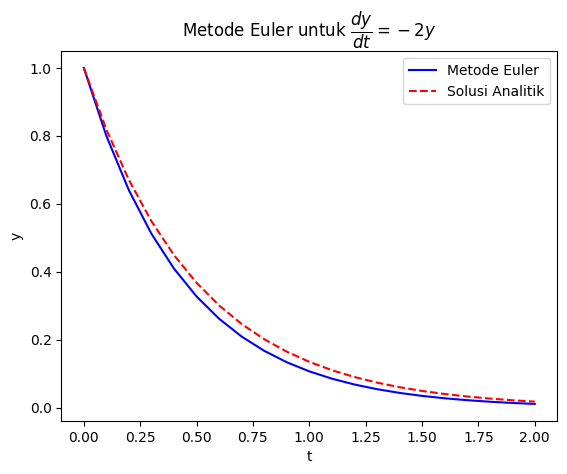

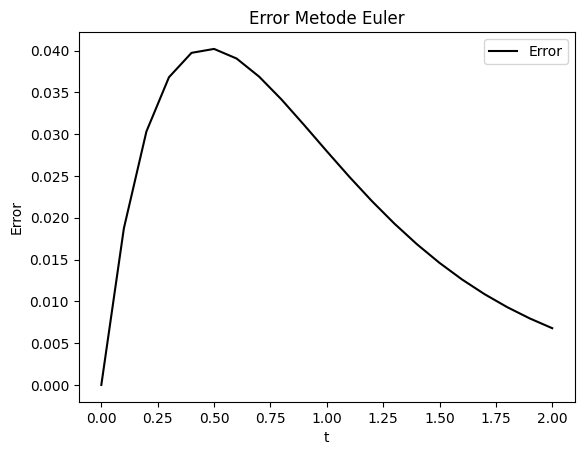

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi turunan
def f(t, y):
    return -2 * y

# Metode Euler
def euler_method(f, y0, t0, T, h):
    N = int((T - t0) / h)  # Jumlah langkah waktu
    t = np.linspace(t0, T, N+1)  # Vektor waktu
    y = np.zeros(N+1)  # Vektor solusi
    y[0] = y0  # Kondisi awal

    for n in range(N):
        y[n+1] = y[n] + h * f(t[n], y[n])

    return t, y

# Parameter
y0 = 1
t0 = 0
T = 2
h = 0.1

# Hitung solusi dengan Metode Euler
t, y_euler = euler_method(f, y0, t0, T, h)

# Solusi analitik untuk perbandingan
y_true = np.exp(-2 * t)

# Hitung error
error = np.abs(y_true - y_euler)

# Error total menggunakan norma L2
error_total = np.linalg.norm(error)

# Plot hasil
plt.plot(t, y_euler, 'b-', label='Metode Euler')
plt.plot(t, y_true, 'r--', label='Solusi Analitik')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Metode Euler untuk $\dfrac{dy}{dt} = -2y$')

# Plot error
plt.figure()
plt.plot(t, error, 'k-', label='Error')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()
plt.title('Error Metode Euler')

# Tampilkan error total
print(f"Error total (norma L2): {error_total:.10f}")

plt.show()


      t   y_euler    y_true     error
0   0.0  1.000000  1.000000  0.000000
1   0.1  0.800000  0.818731  0.018731
2   0.2  0.640000  0.670320  0.030320
3   0.3  0.512000  0.548812  0.036812
4   0.4  0.409600  0.449329  0.039729
5   0.5  0.327680  0.367879  0.040199
6   0.6  0.262144  0.301194  0.039050
7   0.7  0.209715  0.246597  0.036882
8   0.8  0.167772  0.201897  0.034124
9   0.9  0.134218  0.165299  0.031081
10  1.0  0.107374  0.135335  0.027961
Error total (norma L2): 0.1077828630


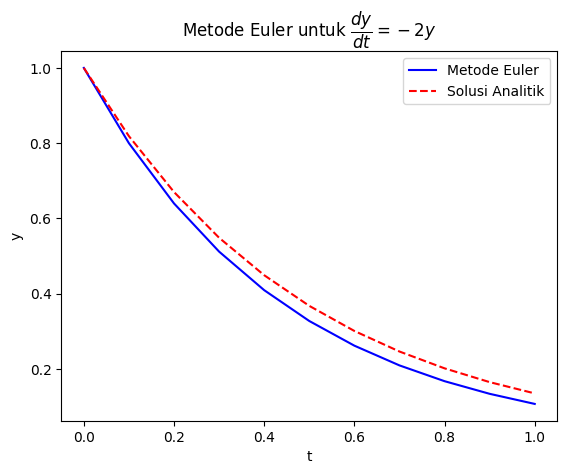

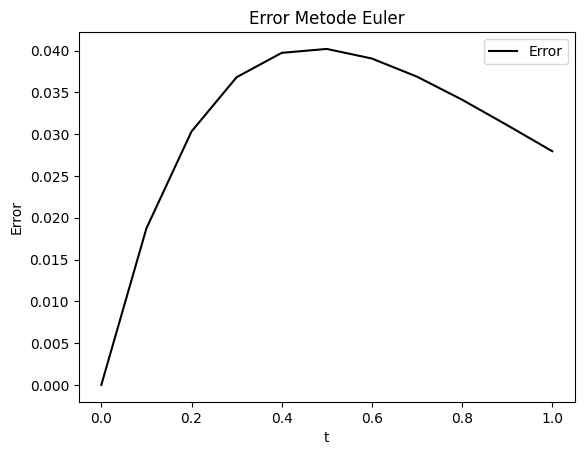

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi turunan
def f(t, y):
    return -2 * y

# Metode Euler
def euler_method(f, y0, t0, T, h):
    N = int((T - t0) / h)  # Jumlah langkah waktu
    t = np.linspace(t0, T, N+1)  # Vektor waktu
    y = np.zeros(N+1)  # Vektor solusi
    y[0] = y0  # Kondisi awal

    for n in range(N):
        y[n+1] = y[n] + h * f(t[n], y[n])

    return t, y

# Parameter
y0 = 1
t0 = 0
T = 1
h = 0.1

# Hitung solusi dengan Metode Euler
t, y_euler = euler_method(f, y0, t0, T, h)

# Solusi analitik untuk perbandingan
y_true = np.exp(-2 * t)

# Hitung error
error = np.abs(y_true - y_euler)

# Error total menggunakan norma L2
error_total = np.linalg.norm(error)

# Buat tabel hasil tiap iterasi
data = {
    't': t,
    'y_euler': y_euler,
    'y_true': y_true,
    'error': error
}
df = pd.DataFrame(data)

# Tampilkan tabel
print(df)

# Plot hasil
plt.plot(t, y_euler, 'b-', label='Metode Euler')
plt.plot(t, y_true, 'r--', label='Solusi Analitik')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Metode Euler untuk $\dfrac{dy}{dt} = -2y$')

# Plot error
plt.figure()
plt.plot(t, error, 'k-', label='Error')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()
plt.title('Error Metode Euler')

# Tampilkan error total
print(f"Error total (norma L2): {error_total:.10f}")

plt.show()


      t     y_rk4    y_true     error
0   0.0  1.000000  1.000000  0.000000
1   0.1  0.818733  0.818731  0.000003
2   0.2  0.670324  0.670320  0.000004
3   0.3  0.548817  0.548812  0.000005
4   0.4  0.449335  0.449329  0.000006
5   0.5  0.367885  0.367879  0.000006
6   0.6  0.301200  0.301194  0.000006
7   0.7  0.246602  0.246597  0.000005
8   0.8  0.201902  0.201897  0.000005
9   0.9  0.165304  0.165299  0.000005
10  1.0  0.135340  0.135335  0.000004
Error total (norma L2): 0.0000156602


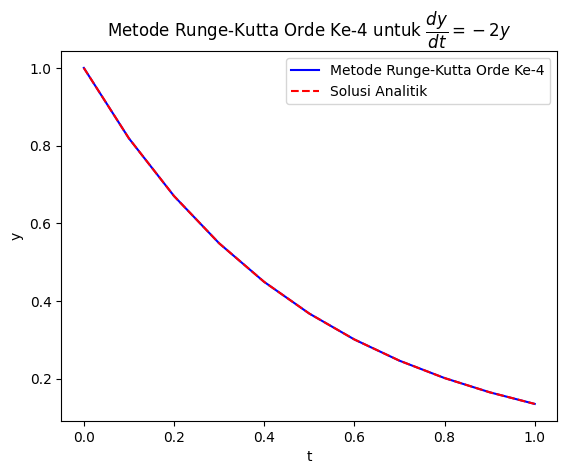

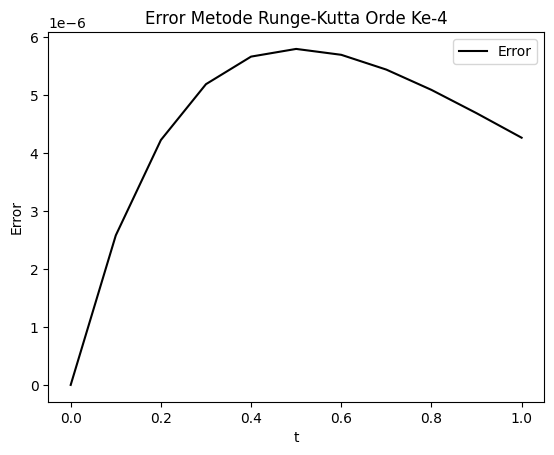

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi turunan
def f(t, y):
    return -2 * y

# Metode Runge-Kutta Orde Ke-4
def runge_kutta_4(f, y0, t0, T, h):
    N = int((T - t0) / h)  # Jumlah langkah waktu
    t = np.linspace(t0, T, N+1)  # Vektor waktu
    y = np.zeros(N+1)  # Vektor solusi
    y[0] = y0  # Kondisi awal

    for n in range(N):
        k1 = h * f(t[n], y[n])
        k2 = h * f(t[n] + h/2, y[n] + k1/2)
        k3 = h * f(t[n] + h/2, y[n] + k2/2)
        k4 = h * f(t[n] + h, y[n] + k3)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return t, y

# Parameter
y0 = 1
t0 = 0
T = 1
h = 0.1

# Hitung solusi dengan Metode Runge-Kutta Orde Ke-4
t, y_rk4 = runge_kutta_4(f, y0, t0, T, h)

# Solusi analitik untuk perbandingan
y_true = np.exp(-2 * t)

# Hitung error
error = np.abs(y_true - y_rk4)

# Error total menggunakan norma L2
error_total = np.linalg.norm(error)

# Buat tabel hasil tiap iterasi
data = {
    't': t,
    'y_rk4': y_rk4,
    'y_true': y_true,
    'error': error
}
df = pd.DataFrame(data)

# Tampilkan tabel
print(df)

# Plot hasil
plt.plot(t, y_rk4, 'b-', label='Metode Runge-Kutta Orde Ke-4')
plt.plot(t, y_true, 'r--', label='Solusi Analitik')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Metode Runge-Kutta Orde Ke-4 untuk $\dfrac{dy}{dt} = -2y$')

# Plot error
plt.figure()
plt.plot(t, error, 'k-', label='Error')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()
plt.title('Error Metode Runge-Kutta Orde Ke-4')

# Tampilkan error total
print(f"Error total (norma L2): {error_total:.10f}")

plt.show()


Metode Heun (RK2):
      t    y_heun    y_true     error
0   0.0  1.000000  1.000000  0.000000
1   0.1  0.820000  0.818731  0.001269
2   0.2  0.672400  0.670320  0.002080
3   0.3  0.551368  0.548812  0.002556
4   0.4  0.452122  0.449329  0.002793
5   0.5  0.370740  0.367879  0.002860
6   0.6  0.304007  0.301194  0.002812
7   0.7  0.249285  0.246597  0.002689
8   0.8  0.204414  0.201897  0.002518
9   0.9  0.167620  0.165299  0.002321
10  1.0  0.137448  0.135335  0.002113

Metode Titik Tengah (RK2):
      t  y_midpoint    y_true     error
0   0.0    1.000000  1.000000  0.000000
1   0.1    0.820000  0.818731  0.001269
2   0.2    0.672400  0.670320  0.002080
3   0.3    0.551368  0.548812  0.002556
4   0.4    0.452122  0.449329  0.002793
5   0.5    0.370740  0.367879  0.002860
6   0.6    0.304007  0.301194  0.002812
7   0.7    0.249285  0.246597  0.002689
8   0.8    0.204414  0.201897  0.002518
9   0.9    0.167620  0.165299  0.002321
10  1.0    0.137448  0.135335  0.002113

Metode RK3:
    

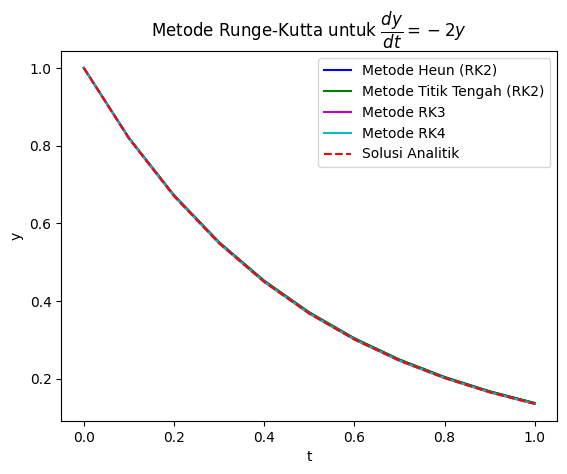

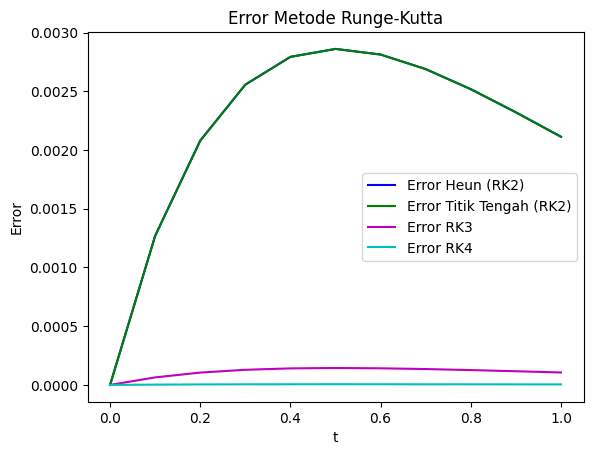

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi turunan
def f(t, y):
    return -2 * y

# Metode Heun (RK2)
def heun_method(f, y0, t0, T, h):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h * f(t[n], y[n])
        k2 = h * f(t[n] + h, y[n] + k1)
        y[n+1] = y[n] + 0.5 * (k1 + k2)
    return t, y

# Metode Titik Tengah (RK2)
def midpoint_method(f, y0, t0, T, h):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h * f(t[n], y[n])
        k2 = h * f(t[n] + h/2, y[n] + k1/2)
        y[n+1] = y[n] + k2
    return t, y

# Metode RK3
def runge_kutta_3(f, y0, t0, T, h):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h * f(t[n], y[n])
        k2 = h * f(t[n] + h/2, y[n] + k1/2)
        k3 = h * f(t[n] + h, y[n] - k1 + 2*k2)
        y[n+1] = y[n] + (k1 + 4*k2 + k3) / 6
    return t, y

# Metode RK4
def runge_kutta_4(f, y0, t0, T, h):
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for n in range(N):
        k1 = h * f(t[n], y[n])
        k2 = h * f(t[n] + h/2, y[n] + k1/2)
        k3 = h * f(t[n] + h/2, y[n] + k2/2)
        k4 = h * f(t[n] + h, y[n] + k3)
        y[n+1] = y[n] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, y

# Parameter
y0 = 1
t0 = 0
T = 1
h = 0.1

# Hitung solusi dengan berbagai metode Runge-Kutta
t_heun, y_heun = heun_method(f, y0, t0, T, h)
t_midpoint, y_midpoint = midpoint_method(f, y0, t0, T, h)
t_rk3, y_rk3 = runge_kutta_3(f, y0, t0, T, h)
t_rk4, y_rk4 = runge_kutta_4(f, y0, t0, T, h)

# Solusi analitik untuk perbandingan
y_true = np.exp(-2 * t_heun)

# Hitung error
error_heun = np.abs(y_true - y_heun)
error_midpoint = np.abs(y_true - y_midpoint)
error_rk3 = np.abs(y_true - y_rk3)
error_rk4 = np.abs(y_true - y_rk4)

# Buat tabel hasil tiap iterasi
data_heun = {
    't': t_heun,
    'y_heun': y_heun,
    'y_true': y_true,
    'error': error_heun
}

data_midpoint = {
    't': t_midpoint,
    'y_midpoint': y_midpoint,
    'y_true': y_true,
    'error': error_midpoint
}

data_rk3 = {
    't': t_rk3,
    'y_rk3': y_rk3,
    'y_true': y_true,
    'error': error_rk3
}

data_rk4 = {
    't': t_rk4,
    'y_rk4': y_rk4,
    'y_true': y_true,
    'error': error_rk4
}

df_heun = pd.DataFrame(data_heun)
df_midpoint = pd.DataFrame(data_midpoint)
df_rk3 = pd.DataFrame(data_rk3)
df_rk4 = pd.DataFrame(data_rk4)

# Tampilkan tabel
print("Metode Heun (RK2):")
print(df_heun)
print("\nMetode Titik Tengah (RK2):")
print(df_midpoint)
print("\nMetode RK3:")
print(df_rk3)
print("\nMetode RK4:")
print(df_rk4)

# Plot hasil
plt.plot(t_heun, y_heun, 'b-', label='Metode Heun (RK2)')
plt.plot(t_midpoint, y_midpoint, 'g-', label='Metode Titik Tengah (RK2)')
plt.plot(t_rk3, y_rk3, 'm-', label='Metode RK3')
plt.plot(t_rk4, y_rk4, 'c-', label='Metode RK4')
plt.plot(t_heun, y_true, 'r--', label='Solusi Analitik')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Metode Runge-Kutta untuk $\dfrac{dy}{dt} = -2y$')

# Plot error
plt.figure()
plt.plot(t_heun, error_heun, 'b-', label='Error Heun (RK2)')
plt.plot(t_midpoint, error_midpoint, 'g-', label='Error Titik Tengah (RK2)')
plt.plot(t_rk3, error_rk3, 'm-', label='Error RK3')
plt.plot(t_rk4, error_rk4, 'c-', label='Error RK4')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()
plt.title('Error Metode Runge-Kutta')

plt.show()


          t         y         error         h
0  0.000000  1.000000  0.000000e+00  0.100000
1  0.100000  0.818731  4.410256e-07  0.100000
2  0.203077  0.666207  4.210687e-07  0.103077
3  0.310564  0.537338  4.237477e-07  0.107487
4  0.422471  0.429582  4.193611e-07  0.111907
5  0.539283  0.340082  4.168884e-07  0.116812
6  0.661397  0.266390  4.135367e-07  0.122113
7  0.789310  0.206259  4.101366e-07  0.127913
8  0.923574  0.157686  4.063911e-07  0.134265
9  1.064829  0.118878  4.023494e-07  0.141255


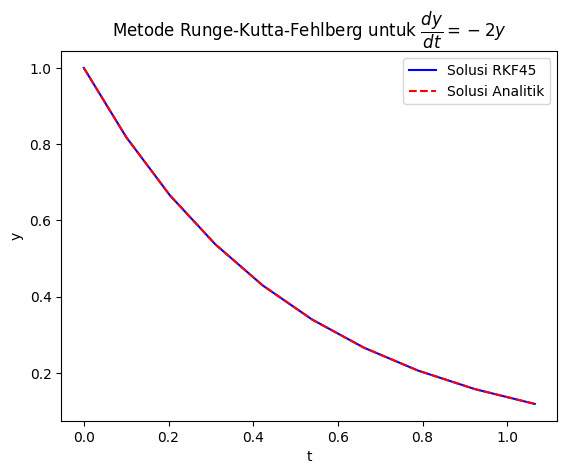

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rkf45(f, t0, y0, T, h, tol):
    t = [t0]
    y = [y0]
    errors = [0]
    hs = [h]

    while t[-1] < T:
        tn = t[-1]
        yn = y[-1]

        k1 = h * f(tn, yn)
        k2 = h * f(tn + 0.25*h, yn + 0.25*k1)
        k3 = h * f(tn + 3/8*h, yn + 3/32*k1 + 9/32*k2)
        k4 = h * f(tn + 12/13*h, yn + 1932/2197*k1 - 7200/2197*k2 + 7296/2197*k3)
        k5 = h * f(tn + h, yn + 439/216*k1 - 8*k2 + 3680/513*k3 - 845/4104*k4)
        k6 = h * f(tn + 0.5*h, yn - 8/27*k1 + 2*k2 - 3544/2565*k3 + 1859/4104*k4 - 11/40*k5)

        y4 = yn + 25/216*k1 + 1408/2565*k3 + 2197/4104*k4 - 1/5*k5
        y5 = yn + 16/135*k1 + 6656/12825*k3 + 28561/56430*k4 - 9/50*k5 + 2/55*k6

        error = np.abs(y5 - y4)

        if error <= tol:
            t.append(tn + h)
            y.append(y5)
            errors.append(error)
            hs.append(h)

        h = h * min(max(0.84 * (tol / error)**0.25, 0.1), 4.0)

    return np.array(t), np.array(y), np.array(errors), np.array(hs)

# Fungsi turunan
def f(t, y):
    return -2 * y

# Parameter
t0 = 0
y0 = 1
T = 1
h = 0.1
tol = 1e-6

# Panggil fungsi RKF45
t, y, errors, hs = rkf45(f, t0, y0, T, h, tol)

# Buat tabel hasil
import pandas as pd
data = {'t': t, 'y': y, 'error': errors, 'h': hs}
df = pd.DataFrame(data)
print(df)

# Plot hasil
plt.plot(t, y, 'b-', label='Solusi RKF45')
plt.plot(t, np.exp(-2 * t), 'r--', label='Solusi Analitik')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.title('Metode Runge-Kutta-Fehlberg untuk $\dfrac{dy}{dt} = -2y$')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

def adams_bashforth(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])

    for n in range(1, len(t)-1):
        y[n+1] = y[n] + h * (1.5 * f(t[n], y[n]) - 0.5 * f(t[n-1], y[n-1]))

    return t, y

# Fungsi turunan
def f(t, y):
    return -2 * y

# Fungsi solusi eksak untuk perhitungan error
def exact_solution(t):
    return np.exp(-2 * t)

# Parameter
t0 = 0
y0 = 1
T = 1
h = 0.1

# Panggil fungsi Adams-Bashforth
t, y_numerical = adams_bashforth(f, t0, y0, T, h)

# Hitung solusi eksak dan error
y_exact = exact_solution(t)
error = np.abs(y_exact - y_numerical)
error_tot = np.linalg.norm(y_exact - y_numerical)
# Buat tabel hasil
data = {
    't': t,
    'y_numerical': y_numerical,
    'y_exact': y_exact,
    'error': error
}

df = pd.DataFrame(data)
print(df)
print(error_tot)

      t  y_numerical   y_exact     error
0   0.0     1.000000  1.000000  0.000000
1   0.1     0.800000  0.818731  0.018731
2   0.2     0.660000  0.670320  0.010320
3   0.3     0.542000  0.548812  0.006812
4   0.4     0.445400  0.449329  0.003929
5   0.5     0.365980  0.367879  0.001899
6   0.6     0.300726  0.301194  0.000468
7   0.7     0.247106  0.246597  0.000509
8   0.8     0.203047  0.201897  0.001150
9   0.9     0.166843  0.165299  0.001545
10  1.0     0.137095  0.135335  0.001760
0.023023299306497273


In [ ]:
import numpy as np
import pandas as pd

def adams_moulton(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for n in range(len(t)-1):
        # Prediksi menggunakan metode Euler
        y_pred = y[n] + h * f(t[n], y[n])

        # Koreksi menggunakan metode Adams-Moulton orde kedua
        y[n+1] = y[n] + h/2 * (f(t[n], y[n]) + f(t[n+1], y_pred))

        # Iterasi koreksi (opsional, untuk akurasi lebih tinggi)
        # for _ in range(max_iterations):
        #     y_new = y[n] + h/2 * (f(t[n], y[n]) + f(t[n+1], y[n+1]))
        #     if np.abs(y_new - y[n+1]) < tolerance:
        #         break
        #     y[n+1] = y_new

    return t, y

# Fungsi turunan
def f(t, y):
    return -2 * y

# Fungsi solusi eksak untuk perhitungan error
def exact_solution(t):
    return np.exp(-2 * t)

# Parameter
t0 = 0
y0 = 1
T = 1
h = 0.1

# Panggil fungsi Adams-Moulton
t, y_numerical = adams_moulton(f, t0, y0, T, h)

# Hitung solusi eksak
y_exact = exact_solution(t)

eror = np.abs(y_exact - y_numerical)
# Hitung error dengan norma L2
error = np.linalg.norm(y_exact - y_numerical)

# Buat tabel hasil
data = {
    't': t,
    'y_numerical': y_numerical,
    'y_exact': y_exact,
    'error': eror
}

df = pd.DataFrame(data)
print("Tabel hasil per iterasi:")
print(df)

print("\nError (L2 norm): {:.6f}".format(error))


Tabel hasil per iterasi:
      t  y_numerical   y_exact     error
0   0.0     1.000000  1.000000  0.000000
1   0.1     0.820000  0.818731  0.001269
2   0.2     0.672400  0.670320  0.002080
3   0.3     0.551368  0.548812  0.002556
4   0.4     0.452122  0.449329  0.002793
5   0.5     0.370740  0.367879  0.002860
6   0.6     0.304007  0.301194  0.002812
7   0.7     0.249285  0.246597  0.002689
8   0.8     0.204414  0.201897  0.002518
9   0.9     0.167620  0.165299  0.002321
10  1.0     0.137448  0.135335  0.002113

Error (L2 norm): 0.007732


In [ ]:
import numpy as np
import pandas as pd

def adams_moulton_order1(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for n in range(len(t)-1):
        # Metode Euler Backward (orde pertama)
        y[n+1] = y[n] + h * f(t[n+1], y[n+1])

    return t, y

def adams_moulton_order2(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for n in range(len(t)-1):
        # Prediksi menggunakan metode Euler
        y_pred = y[n] + h * f(t[n], y[n])

        # Koreksi menggunakan metode Adams-Moulton orde kedua
        y[n+1] = y[n] + h/2 * (f(t[n], y[n]) + f(t[n+1], y_pred))

    return t, y

def adams_moulton_order3(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk dua langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])

    for n in range(2, len(t)-1):
        # Prediksi menggunakan metode Adams-Bashforth orde kedua
        y_pred = y[n] + h * (3/2 * f(t[n], y[n]) - 1/2 * f(t[n-1], y[n-1]))

        # Koreksi menggunakan metode Adams-Moulton orde ketiga
        y[n+1] = y[n] + h/12 * (5 * f(t[n+1], y_pred) + 8 * f(t[n], y[n]) - f(t[n-1], y[n-1]))

    return t, y

def adams_moulton_order4(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk tiga langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])
    y[3] = y[2] + h * f(t[2], y[2])

    for n in range(3, len(t)-1):
        # Prediksi menggunakan metode Adams-Bashforth orde ketiga
        y_pred = y[n] + h * (23/12 * f(t[n], y[n]) - 16/12 * f(t[n-1], y[n-1]) + 5/12 * f(t[n-2], y[n-2]))

        # Koreksi menggunakan metode Adams-Moulton orde keempat
        y[n+1] = y[n] + h/24 * (9 * f(t[n+1], y_pred) + 19 * f(t[n], y[n]) - 5 * f(t[n-1], y[n-1]) + f(t[n-2], y[n-2]))

    return t, y

# Fungsi turunan
def f(t, y):
    return -2 * y

# Fungsi solusi eksak untuk perhitungan error
def exact_solution(t):
    return np.exp(-2 * t)

# Parameter
t0 = 0
y0 = 1
T = 1
h = 0.1

# Panggil fungsi Adams-Moulton orde pertama
t1, y_numerical1 = adams_moulton_order1(f, t0, y0, T, h)

# Panggil fungsi Adams-Moulton orde kedua
t2, y_numerical2 = adams_moulton_order2(f, t0, y0, T, h)

# Panggil fungsi Adams-Moulton orde ketiga
t3, y_numerical3 = adams_moulton_order3(f, t0, y0, T, h)

# Panggil fungsi Adams-Moulton orde keempat
t4, y_numerical4 = adams_moulton_order4(f, t0, y0, T, h)

# Hitung solusi eksak
y_exact = exact_solution(t1)

# Hitung error dengan norma L2 untuk setiap orde
error1 = np.linalg.norm(y_exact - y_numerical1)
error2 = np.linalg.norm(y_exact - y_numerical2)
error3 = np.linalg.norm(y_exact - y_numerical3)
error4 = np.linalg.norm(y_exact - y_numerical4)

# Buat tabel hasil
data1 = {
    't': t1,
    'y_numerical_order1': y_numerical1,
    'y_exact': y_exact
}

data2 = {
    't': t2,
    'y_numerical_order2': y_numerical2,
    'y_exact': y_exact
}

data3 = {
    't': t3,
    'y_numerical_order3': y_numerical3,
    'y_exact': y_exact
}

data4 = {
    't': t4,
    'y_numerical_order4': y_numerical4,
    'y_exact': y_exact
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

print("Tabel hasil per iterasi untuk orde pertama:")
print(df1)

print("\nError (L2 norm) untuk orde pertama: {:.6f}".format(error1))

print("\nTabel hasil per iterasi untuk orde kedua:")
print(df2)

print("\nError (L2 norm) untuk orde kedua: {:.6f}".format(error2))

print("\nTabel hasil per iterasi untuk orde ketiga:")
print(df3)

print("\nError (L2 norm) untuk orde ketiga: {:.6f}".format(error3))

print("\nTabel hasil per iterasi untuk orde keempat:")
print(df4)

print("\nError (L2 norm) untuk orde keempat: {:.6f}".format(error4))


Tabel hasil per iterasi untuk orde pertama:
      t  y_numerical_order1   y_exact
0   0.0                 1.0  1.000000
1   0.1                 1.0  0.818731
2   0.2                 1.0  0.670320
3   0.3                 1.0  0.548812
4   0.4                 1.0  0.449329
5   0.5                 1.0  0.367879
6   0.6                 1.0  0.301194
7   0.7                 1.0  0.246597
8   0.8                 1.0  0.201897
9   0.9                 1.0  0.165299
10  1.0                 1.0  0.135335

Error (L2 norm) untuk orde pertama: 2.045781

Tabel hasil per iterasi untuk orde kedua:
      t  y_numerical_order2   y_exact
0   0.0            1.000000  1.000000
1   0.1            0.820000  0.818731
2   0.2            0.672400  0.670320
3   0.3            0.551368  0.548812
4   0.4            0.452122  0.449329
5   0.5            0.370740  0.367879
6   0.6            0.304007  0.301194
7   0.7            0.249285  0.246597
8   0.8            0.204414  0.201897
9   0.9            0.167620  0.

In [ ]:
import numpy as np
import pandas as pd

def adams_bashforth_order1(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    for n in range(len(t)-1):
        # Metode Euler (orde pertama)
        y[n+1] = y[n] + h * f(t[n], y[n])

    return t, y

def adams_bashforth_order2(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])

    for n in range(1, len(t)-1):
        # Metode Adams-Bashforth orde kedua
        y[n+1] = y[n] + h/2 * (3 * f(t[n], y[n]) - f(t[n-1], y[n-1]))

    return t, y

def adams_bashforth_order3(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk dua langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])

    for n in range(2, len(t)-1):
        # Metode Adams-Bashforth orde ketiga
        y[n+1] = y[n] + h/12 * (23 * f(t[n], y[n]) - 16 * f(t[n-1], y[n-1]) + 5 * f(t[n-2], y[n-2]))

    return t, y

def adams_bashforth_order4(f, t0, y0, T, h):
    t = np.arange(t0, T+h, h)
    y = np.zeros(len(t))
    y[0] = y0

    # Inisialisasi dengan metode Euler untuk tiga langkah pertama
    y[1] = y[0] + h * f(t[0], y[0])
    y[2] = y[1] + h * f(t[1], y[1])
    y[3] = y[2] + h * f(t[2], y[2])

    for n in range(3, len(t)-1):
        # Metode Adams-Bashforth orde keempat
        y[n+1] = y[n] + h/24 * (55 * f(t[n], y[n]) - 59 * f(t[n-1], y[n-1]) + 37 * f(t[n-2], y[n-2]) - 9 * f(t[n-3], y[n-3]))

    return t, y

# Fungsi turunan
def f(t, y):
    return -2 * y

# Fungsi solusi eksak untuk perhitungan error
def exact_solution(t):
    return np.exp(-2 * t)

# Parameter
t0 = 0
y0 = 1
T = 1
h = 0.1

# Panggil fungsi Adams-Bashforth orde pertama
t1, y_numerical1 = adams_bashforth_order1(f, t0, y0, T, h)

# Panggil fungsi Adams-Bashforth orde kedua
t2, y_numerical2 = adams_bashforth_order2(f, t0, y0, T, h)

# Panggil fungsi Adams-Bashforth orde ketiga
t3, y_numerical3 = adams_bashforth_order3(f, t0, y0, T, h)

# Panggil fungsi Adams-Bashforth orde keempat
t4, y_numerical4 = adams_bashforth_order4(f, t0, y0, T, h)

# Hitung solusi eksak
y_exact = exact_solution(t1)

# Hitung error dengan norma L2 untuk setiap orde
error1 = np.linalg.norm(y_exact - y_numerical1)
error2 = np.linalg.norm(y_exact - y_numerical2)
error3 = np.linalg.norm(y_exact - y_numerical3)
error4 = np.linalg.norm(y_exact - y_numerical4)

# Buat tabel hasil
data1 = {
    't': t1,
    'y_numerical_order1': y_numerical1,
    'y_exact': y_exact
}

data2 = {
    't': t2,
    'y_numerical_order2': y_numerical2,
    'y_exact': y_exact
}

data3 = {
    't': t3,
    'y_numerical_order3': y_numerical3,
    'y_exact': y_exact
}

data4 = {
    't': t4,
    'y_numerical_order4': y_numerical4,
    'y_exact': y_exact
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)

print("Tabel hasil per iterasi untuk orde pertama:")
print(df1)

print("\nError (L2 norm) untuk orde pertama: {:.6f}".format(error1))

print("\nTabel hasil per iterasi untuk orde kedua:")
print(df2)

print("\nError (L2 norm) untuk orde kedua: {:.6f}".format(error2))

print("\nTabel hasil per iterasi untuk orde ketiga:")
print(df3)

print("\nError (L2 norm) untuk orde ketiga: {:.6f}".format(error3))

print("\nTabel hasil per iterasi untuk orde keempat:")
print(df4)

print("\nError (L2 norm) untuk orde keempat: {:.6f}".format(error4))


Tabel hasil per iterasi untuk orde pertama:
      t  y_numerical_order1   y_exact
0   0.0            1.000000  1.000000
1   0.1            0.800000  0.818731
2   0.2            0.640000  0.670320
3   0.3            0.512000  0.548812
4   0.4            0.409600  0.449329
5   0.5            0.327680  0.367879
6   0.6            0.262144  0.301194
7   0.7            0.209715  0.246597
8   0.8            0.167772  0.201897
9   0.9            0.134218  0.165299
10  1.0            0.107374  0.135335

Error (L2 norm) untuk orde pertama: 0.107783

Tabel hasil per iterasi untuk orde kedua:
      t  y_numerical_order2   y_exact
0   0.0            1.000000  1.000000
1   0.1            0.800000  0.818731
2   0.2            0.660000  0.670320
3   0.3            0.542000  0.548812
4   0.4            0.445400  0.449329
5   0.5            0.365980  0.367879
6   0.6            0.300726  0.301194
7   0.7            0.247106  0.246597
8   0.8            0.203047  0.201897
9   0.9            0.166843  0.

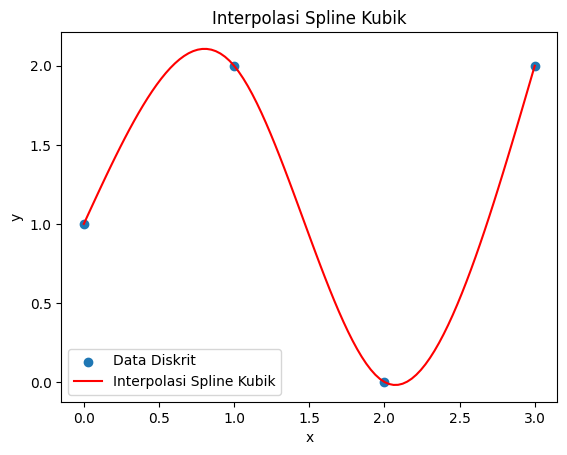

Koefisien spline kubik (untuk setiap segmen polinomial kubik):
Segmen 0: a = 1.0, b = 2.0666666666666664, c = 4.440892098500626e-16, d = -1.0666666666666669
Segmen 1: a = 2.0, b = -1.1333333333333333, c = -3.2, d = 2.3333333333333335
Segmen 2: a = 0.0, b = -0.5333333333333333, c = 3.8, d = -1.2666666666666666


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data diskrit
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 2])

# Buat spline kubik
cs = CubicSpline(x, y, bc_type='natural')

# Titik baru untuk evaluasi interpolasi
x_new = np.linspace(0, 3, 100)
y_new = cs(x_new)

# Plot
plt.scatter(x, y, label='Data Diskrit')
plt.plot(x_new, y_new, label='Interpolasi Spline Kubik', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Spline Kubik')
plt.show()

# Dapatkan koefisien spline kubik
coefficients = cs.c

print("Koefisien spline kubik (untuk setiap segmen polinomial kubik):")
for i in range(len(coefficients[0])):
    print(f"Segmen {i}: a = {coefficients[3, i]}, b = {coefficients[2, i]}, c = {coefficients[1, i]}, d = {coefficients[0, i]}")


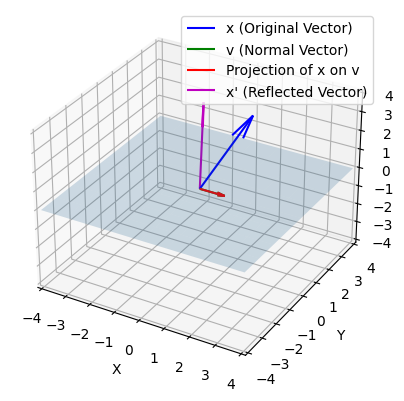

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi untuk menggambar vektor
def plot_vector(ax, vec, color, label):
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=color, label=label)

# Definisi vektor x dan vektor v
x = np.array([1, 2, 3])
v = np.array([1, 0, 0])
v = v / np.linalg.norm(v)  # Normalisasi vektor v

# Proyeksi x pada v
proj_x_on_v = np.dot(x, v) * v

# Vektor refleksi
x_reflected = x - 2 * (proj_x_on_v)

# Membuat plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])

# Plot vektor x, vektor proyeksi, dan vektor refleksi
plot_vector(ax, x, 'b', 'x (Original Vector)')
plot_vector(ax, v, 'g', 'v (Normal Vector)')
plot_vector(ax, proj_x_on_v, 'r', 'Projection of x on v')
plot_vector(ax, x_reflected, 'm', 'x\' (Reflected Vector)')

# Plot hyperplane
xx, yy = np.meshgrid(range(-4, 5), range(-4, 5))
z = 0 * xx  # Hyperplane z = 0

ax.plot_surface(xx, yy, z, alpha=0.2)

# Label plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [ ]:
import numpy as np

def givens_rotation(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    # Iterasi untuk setiap elemen di bawah diagonal utama
    for j in range(n):
        for i in range(m-1, j, -1):
            if R[i, j] != 0:
                r = np.hypot(R[i-1, j], R[i, j])
                c = R[i-1, j] / r
                s = -R[i, j] / r

                G = np.eye(m)
                G[[i-1, i], [i-1, i]] = c
                G[i-1, i] = s
                G[i, i-1] = -s

                R = G @ R
                Q = Q @ G.T

    return Q, R

# Contoh penggunaan
A = np.array([[170, 1, 75], [165, 1, 67], [167, 1, 78], [160, 1, 50]])
Q, R = givens_rotation(A)

print("Matriks Q:")
print(Q)
print("\nMatriks R:")
print(R)


Matriks Q:
[[ 0.71945764  0.49217367  0.47687184 -0.11286725]
 [-0.69329022  0.51160547  0.47670858 -0.17423389]
 [ 0.03002817 -0.47684045  0.24732816 -0.84294144]
 [-0.02876951 -0.51831274  0.69582394  0.49633986]]

Matriks R:
[[ 8.32649757e+00  2.74260937e-02  8.41260096e+00]
 [ 5.52203284e+00  8.62594951e-03  8.08139962e+00]
 [ 3.12360762e+02  1.89673252e+00  1.21787656e+02]
 [-1.09292868e+02 -6.33702723e-01 -6.10711540e+01]]


In [ ]:
import numpy as np

# Fungsi untuk melakukan faktorisasi SVD
def svd_factorization(A):
    # Menggunakan fungsi svd dari numpy untuk faktorisasi SVD
    U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

    # Membuat matriks diagonal Sigma dari vektor sigma
    Sigma = np.diag(sigma)

    return U, Sigma, Vt

# Contoh matriks
A = np.array([[1, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [0, 1, 0],
              [1, 1, 0]])

# Melakukan faktorisasi SVD
U, Sigma, Vt = svd_factorization(A)

print("Matriks U:")
print(U)
print("\nMatriks Sigma:")
print(Sigma)
print("\nMatriks Vt:")
print(Vt)


Matriks U:
[[-3.65148372e-01 -8.16496581e-01 -2.39546263e-16]
 [-3.65148372e-01  4.08248290e-01  2.56842409e-17]
 [-5.47722558e-01  1.92577541e-16 -7.07106781e-01]
 [-3.65148372e-01  4.08248290e-01  3.74131123e-17]
 [-5.47722558e-01 -1.27270181e-16  7.07106781e-01]]

Matriks Sigma:
[[2.23606798 0.         0.        ]
 [0.         1.41421356 0.        ]
 [0.         0.         1.        ]]

Matriks Vt:
[[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-5.77350269e-01  5.77350269e-01 -5.77350269e-01]
 [ 7.07106781e-01  1.11022302e-16 -7.07106781e-01]]


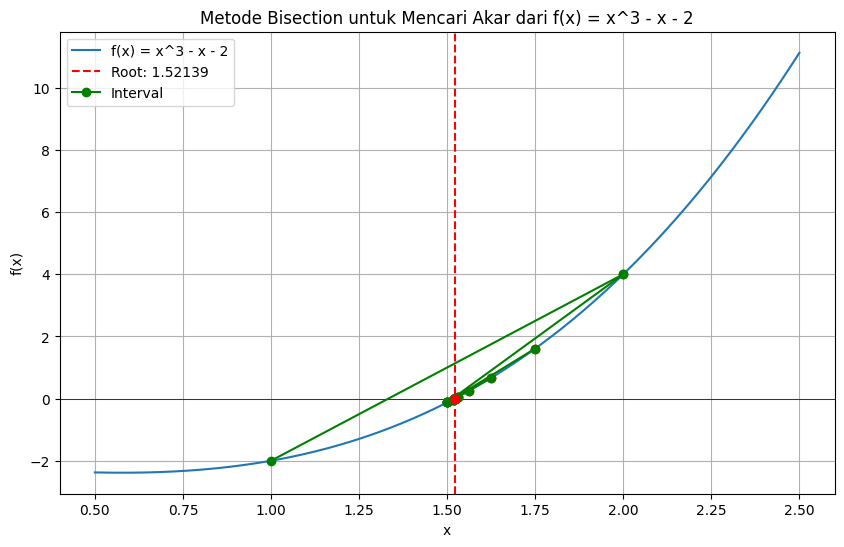

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 2

def bisection_method(f, a, b, tol):
    if f(a) * f(b) >= 0:
        raise ValueError("Function must have different signs at endpoints a and b.")

    a_values = []
    b_values = []
    mid_values = []

    while (b - a) / 2 > tol:
        a_values.append(a)
        b_values.append(b)
        mid = (a + b) / 2
        mid_values.append(mid)

        if f(mid) == 0:
            return mid
        elif f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid

    return (a + b) / 2, a_values, b_values, mid_values

# Define the interval and tolerance
a = 1
b = 2
tol = 1e-5

# Apply the bisection method
root, a_values, b_values, mid_values = bisection_method(f, a, b, tol)

# Plotting the function and the bisection process
x = np.linspace(a - 0.5, b + 0.5, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^3 - x - 2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='red', linestyle='--', label=f'Root: {root:.5f}')

for i, (a, b, mid) in enumerate(zip(a_values, b_values, mid_values)):
    plt.plot([a, b], [f(a), f(b)], 'go-', label='Interval' if i == 0 else "")
    plt.plot(mid, f(mid), 'ro')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Metode Bisection untuk Mencari Akar dari f(x) = x^3 - x - 2')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def f(x):
    # Definisikan fungsi yang ingin diintegrasikan
    return np.sin(x)

def romberg_integration(f, a, b, tol=1e-6):
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # Matriks R dengan R[0][0] sebagai integral awal menggunakan metode trapezoid
    n = 1
    print(f"Iterasi 0: {R[0]}")  # Cetak hasil awal

    while True:
        h = (b - a) / (2 ** n)
        sum_trapezoid = sum(f(a + (2 * k - 1) * h) for k in range(1, 2 ** (n - 1) + 1))
        row_n = [0.5 * R[n - 1][0] + h * sum_trapezoid]

        # Ekstrapolasi Richardson
        for m in range(1, n + 1):
            row_n.append(row_n[m - 1] + (row_n[m - 1] - R[n - 1][m - 1]) / (4 ** m - 1))

        R.append(row_n)

        # Cetak hasil tiap iterasi
        print(f"Iterasi {n}: {row_n}")

        # Periksa konvergensi
        if abs(R[n][n] - R[n - 1][n - 1]) < tol:
            return R[n][n], R

        n += 1

# Contoh penggunaan
a = 0  # Batas bawah
b = np.pi  # Batas atas
result, R = romberg_integration(f, a, b)
print(f"\nHasil integral menggunakan aturan Romberg adalah: {result}")

# Cetak tabel hasil
print("\nTabel Hasil:")
for i, row in enumerate(R):
    print(f"Iterasi {i}: {row}")


Iterasi 0: [1.9236706937217898e-16]
Iterasi 1: [1.5707963267948966, 2.0943951023931953]
Iterasi 2: [1.8961188979370398, 2.0045597549844207, 1.9985707318238357]
Iterasi 3: [1.974231601945551, 2.000269169948388, 1.999983130945986, 2.000005549979671]
Iterasi 4: [1.9935703437723395, 2.0000165910479355, 1.999999752454572, 2.0000000162880416, 1.9999999945872902]
Iterasi 5: [1.9983933609701445, 2.0000010333694127, 1.9999999961908446, 2.0000000000596745, 1.9999999999960338, 2.000000000001321]

Hasil integral menggunakan aturan Romberg adalah: 2.000000000001321

Tabel Hasil:
Iterasi 0: [1.9236706937217898e-16]
Iterasi 1: [1.5707963267948966, 2.0943951023931953]
Iterasi 2: [1.8961188979370398, 2.0045597549844207, 1.9985707318238357]
Iterasi 3: [1.974231601945551, 2.000269169948388, 1.999983130945986, 2.000005549979671]
Iterasi 4: [1.9935703437723395, 2.0000165910479355, 1.999999752454572, 2.0000000162880416, 1.9999999945872902]
Iterasi 5: [1.9983933609701445, 2.0000010333694127, 1.99999999619084

In [ ]:
import numpy as np

def f(x):
    # Definisikan fungsi yang ingin diintegrasikan
    return np.sin(x)

def adaptive_simpson(f, a, b, tol, max_recursion_depth=50):
    def simpson(f, a, b):
        c = (a + b) / 2.0
        h3 = abs(b - a) / 6.0
        return h3 * (f(a) + 4.0 * f(c) + f(b))

    def recursive_adaptive_simpson(f, a, b, tol, whole, depth):
        c = (a + b) / 2.0
        left = simpson(f, a, c)
        right = simpson(f, c, b)
        if depth <= 0 or abs(left + right - whole) <= 15 * tol:
            return left + right + (left + right - whole) / 15.0
        return recursive_adaptive_simpson(f, a, c, tol/2.0, left, depth-1) + \
               recursive_adaptive_simpson(f, c, b, tol/2.0, right, depth-1)

    initial = simpson(f, a, b)
    return recursive_adaptive_simpson(f, a, b, tol, initial, max_recursion_depth)

# Contoh penggunaan
a = 0  # Batas bawah
b = np.pi  # Batas atas
tol = 1e-6  # Toleransi
result = adaptive_simpson(f, a, b, tol)
print(f"Hasil integral menggunakan metode Simpson adaptif adalah: {result}")


Hasil integral menggunakan metode Simpson adaptif adalah: 1.9999999988423984


In [ ]:
import numpy as np

def f(x):
    # Definisikan fungsi yang ingin diintegrasikan
    return np.sin(x)

def simpson(f, a, b):
    c = (a + b) / 2.0
    h3 = abs(b - a) / 2.0
    return h3 * (f(a) + 4.0 * f(c) + f(b))

def adaptive_simpson(f, a, b, tol, max_recursion_depth=50):
    def recursive_adaptive_simpson(f, a, b, tol, whole, depth, results):
        c = (a + b) / 2.0
        left = simpson(f, a, c)
        right = simpson(f, c, b)
        est_error = (left + right - whole) / 15.0

        results.append((a, b, left + right, est_error))

        if depth <= 0 or abs(left + right - whole) <= 15 * tol:
            return left + right + est_error
        return recursive_adaptive_simpson(f, a, c, tol / 2.0, left, depth - 1, results) + \
               recursive_adaptive_simpson(f, c, b, tol / 2.0, right, depth - 1, results)

    initial = simpson(f, a, b)
    results = [(a, b, initial, 0)]  # Initialize with the initial approximation
    final_result = recursive_adaptive_simpson(f, a, b, tol, initial, max_recursion_depth, results)

    return final_result, results

# Contoh penggunaan
a = 0  # Batas bawah
b = np.pi  # Batas atas
tol = 1e-6  # Toleransi
result, iterations = adaptive_simpson(f, a, b, tol)

# Cetak hasil
print(f"\nHasil integral menggunakan metode Simpson adaptif adalah: {result}")

# Cetak tabel hasil tiap iterasi
print("\nTabel Hasil Tiap Iterasi:")
print("Iterasi\t\tInterval [a, b]\t\tEstimasi Integral\tEstimasi Error")
for i, (a, b, integral, error) in enumerate(iterations):
    print(f"{i+1}\t\t[{a:.5f}, {b:.5f}]\t\t{integral:.10f}\t\t{error:.10e}")



Hasil integral menggunakan metode Simpson adaptif adalah: 5.9999999989658

Tabel Hasil Tiap Iterasi:
Iterasi		Interval [a, b]		Estimasi Integral	Estimasi Error
1		[0.00000, 3.14159]		6.2831853072		0.0000000000e+00
2		[0.00000, 3.14159]		6.0136792650		-1.7967069482e-02
3		[0.00000, 1.57080]		3.0004037549		-4.2905850360e-04
4		[0.00000, 0.78540]		0.8786869455		-7.3978647158e-06
5		[0.00000, 0.39270]		0.2283615205		-1.1842577622e-07
6		[0.39270, 0.78540]		0.6503185900		-3.3724807775e-07
7		[0.39270, 0.58905]		0.2772297696		-8.9530372708e-09
8		[0.58905, 0.78540]		0.3730885054		-1.2048761204e-08
9		[0.78540, 1.57080]		2.1213379410		-1.7860025329e-05
10		[0.78540, 1.17810]		0.9732705493		-5.0472741662e-07
11		[0.78540, 0.98175]		0.4546096592		-1.4681458009e-08
12		[0.98175, 1.17810]		0.5186604187		-1.6749954609e-08
13		[1.17810, 1.57080]		1.1480508903		-5.9536658166e-07
14		[1.17810, 1.37445]		0.5627793492		-1.8174759853e-08
15		[1.37445, 1.57080]		0.5852709849		-1.8901119262e-08
16		[1.57

In [ ]:
def adaptive_simpsons(f, a, b, tol, max_recursion_depth=50):
    """
    Menghitung integral dari fungsi f di interval [a, b] menggunakan aturan Adaptive Simpson's Rule.

    Parameters:
    f (function): Fungsi yang akan diintegralkan.
    a (float): Batas bawah integral.
    b (float): Batas atas integral.
    tol (float): Toleransi kesalahan yang diizinkan.
    max_recursion_depth (int): Batas maksimal kedalaman rekursi untuk mencegah rekursi tak terbatas.

    Returns:
    float: Nilai pendekatan integral dari f di [a, b].
    """

    def simpsons_rule(f, a, b):
        """ Menghitung integral menggunakan aturan Simpson biasa pada interval [a, b]. """
        c = (a + b) / 2.0
        h = (b - a) / 2.0
        return (h / 3.0) * (f(a) + 4.0 * f(c) + f(b))

    def adaptive_simpsons_recursive(f, a, b, tol, depth, results):
        """ Rekursi pada aturan Adaptive Simpson's Rule dengan mencatat hasil setiap iterasi. """
        c = (a + b) / 2.0
        S = simpsons_rule(f, a, b)
        S1 = simpsons_rule(f, a, c)
        S2 = simpsons_rule(f, c, b)
        E = (S1 + S2 - S) / 15.0
        estimated_error = abs(E)
        results.append((depth, (a, b), S1 + S2 + E, estimated_error))

        if estimated_error < tol or depth >= max_recursion_depth:
            return S1 + S2 + E
        else:
            return (adaptive_simpsons_recursive(f, a, c, tol, depth + 1, results) +
                    adaptive_simpsons_recursive(f, c, b, tol, depth + 1, results))

    results = []
    integral_value = adaptive_simpsons_recursive(f, a, b, tol, 0, results)
    return integral_value, results

# Contoh penggunaan
import numpy as np

def func(x):
    return np.sin(x)

a = 0
b = np.pi
tol = 1e-6

# Hitung integral dan hasil tiap iterasinya
integral_value, iteration_results = adaptive_simpsons(func, a, b, tol)

print(f"Nilai integral dari sin(x) di interval [0, pi] adalah sekitar {integral_value:.10f}\n")

print("Iterasi dan Estimasi Kesalahan:")
print("Iterasi\t\tInterval [a, b]\t\tEstimasi Integral\t\tEstimasi Kesalahan")
print("----------------------------------------------------------------------")
for i, (depth, (a_i, b_i), integral_i, error_i) in enumerate(iteration_results):
    print(f"{depth}\t\t[{a_i:.6f}, {b_i:.6f}]\t\t{integral_i:.10f}\t\t{error_i:.10f}")


Nilai integral dari sin(x) di interval [0, pi] adalah sekitar 1.9999999962

Iterasi dan Estimasi Kesalahan:
Iterasi		Interval [a, b]		Estimasi Integral		Estimasi Kesalahan
----------------------------------------------------------------------
0		[0.000000, 3.141593]		1.9985707318		0.0059890232
1		[0.000000, 1.570796]		0.9999915655		0.0001430195
2		[0.000000, 0.785398]		0.2928931826		0.0000024660
3		[0.000000, 0.392699]		0.0761204673		0.0000000395
3		[0.392699, 0.785398]		0.2167727509		0.0000001124
2		[0.785398, 1.570796]		0.7071066937		0.0000059533
3		[0.785398, 1.178097]		0.3244233482		0.0000001682
3		[1.178097, 1.570796]		0.3826834316		0.0000001985
1		[1.570796, 3.141593]		0.9999915655		0.0001430195
2		[1.570796, 2.356194]		0.7071066937		0.0000059533
3		[1.570796, 1.963495]		0.3826834316		0.0000001985
3		[1.963495, 2.356194]		0.3244233482		0.0000001682
2		[2.356194, 3.141593]		0.2928931826		0.0000024660
3		[2.356194, 2.748894]		0.2167727509		0.0000001124
3		[2.748894, 3.141593]		0.07

In [ ]:
import numpy as np

def f(x):
    return np.sin(x)

def simpson(f, a, b):
    c = (a + b) / 2.0
    h3 = abs(b - a) / 6.0
    return h3 * (f(a) + 4.0 * f(c) + f(b))

def adaptive_simpson_manual(f, a, b, tol, max_recursion_depth=4):
    results = []

    def recursive_adaptive_simpson(f, a, b, tol, depth):
        c = (a + b) / 2.0
        left = simpson(f, a, c)
        right = simpson(f, c, b)
        whole = simpson(f, a, b)
        est_error = (left + right - whole) / 15.0
        results.append((a, b, left + right, est_error))

        if depth >= max_recursion_depth or abs(left + right - whole) <= 15 * tol:
            return left + right + est_error
        return recursive_adaptive_simpson(f, a, c, tol/2.0, depth + 1) + \
               recursive_adaptive_simpson(f, c, b, tol/2.0, depth + 1)

    final_result = recursive_adaptive_simpson(f, a, b, tol, 0)
    return final_result, results

# Contoh penggunaan
a = 0
b = np.pi
tol = 1e-6
result, iterations = adaptive_simpson_manual(f, a, b, tol)

# Cetak hasil
print(f"\nHasil integral menggunakan metode Simpson adaptif adalah: {result}")

# Cetak tabel hasil tiap iterasi
print("\nTabel Hasil Tiap Iterasi:")
print("Iterasi\t\tInterval [a, b]\t\tEstimasi Integral\tEstimasi Error")
for i, (a, b, integral, error) in enumerate(iterations):
    print(f"{i+1}\t\t[{a:.5f}, {b:.5f}]\t\t{integral:.10f}\t\t{error:.10e}")



Hasil integral menggunakan metode Simpson adaptif adalah: 1.9999999988423984

Tabel Hasil Tiap Iterasi:
Iterasi		Interval [a, b]		Estimasi Integral	Estimasi Error
1		[0.00000, 3.14159]		2.0045597550		-5.9890231606e-03
2		[0.00000, 1.57080]		1.0001345850		-1.4301950120e-04
3		[0.00000, 0.78540]		0.2928956485		-2.4659549053e-06
4		[0.00000, 0.39270]		0.0761205068		-3.9475258740e-08
5		[0.39270, 0.78540]		0.2167728633		-1.1241602592e-07
6		[0.78540, 1.57080]		0.7071126470		-5.9533417765e-06
7		[0.78540, 1.17810]		0.3244235164		-1.6824247221e-07
8		[0.78540, 0.98175]		0.1515365531		-4.8938193368e-09
9		[0.98175, 1.17810]		0.1728868062		-5.5833182022e-09
10		[1.17810, 1.57080]		0.3826836301		-1.9845552722e-07
11		[1.17810, 1.37445]		0.1875931164		-6.0582532842e-09
12		[1.37445, 1.57080]		0.1950903283		-6.3003730862e-09
13		[1.57080, 3.14159]		1.0001345850		-1.4301950120e-04
14		[1.57080, 2.35619]		0.7071126470		-5.9533417765e-06
15		[1.57080, 1.96350]		0.3826836301		-1.9845552722e-07
16		[

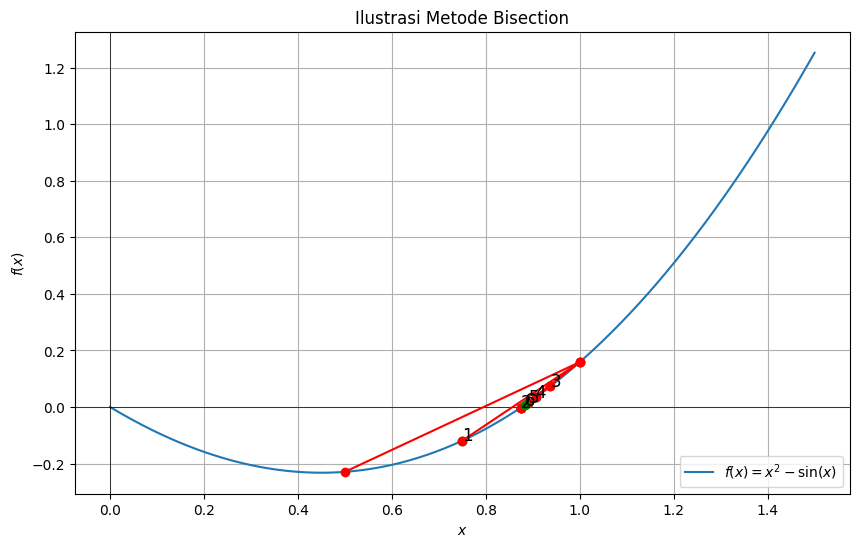

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang akan dicari akarnya
def f(x):
    return x**2 - np.sin(x)

# Interval dan toleransi
a = 0.5
b = 1
tol = 1e-2

# List untuk menyimpan titik interval dan nilai fungsinya
intervals = [(a, b)]
iterations = []

# Implementasi metode Bisection dengan menyimpan setiap iterasi
while (b - a) / 2.0 > tol:
    c = (a + b) / 2.0
    fc = f(c)
    iterations.append((a, b, c, f(a), f(b), fc))
    if fc == 0:
        break
    elif f(a) * fc < 0:
        b = c
    else:
        a = c
    intervals.append((a, b))

c = (a + b) / 2.0
fc = f(c)
iterations.append((a, b, c, f(a), f(b), fc))

# Plot fungsi
x = np.linspace(0, 1.5, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = x^2 - \sin(x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plot iterasi metode Bisection
for i, (a, b, c, fa, fb, fc) in enumerate(iterations):
    plt.plot([a, b], [fa, fb], 'ro-')
    plt.plot(c, fc, 'go')
    plt.text(c, fc, f'{i+1}', fontsize=12)

plt.title('Ilustrasi Metode Bisection')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


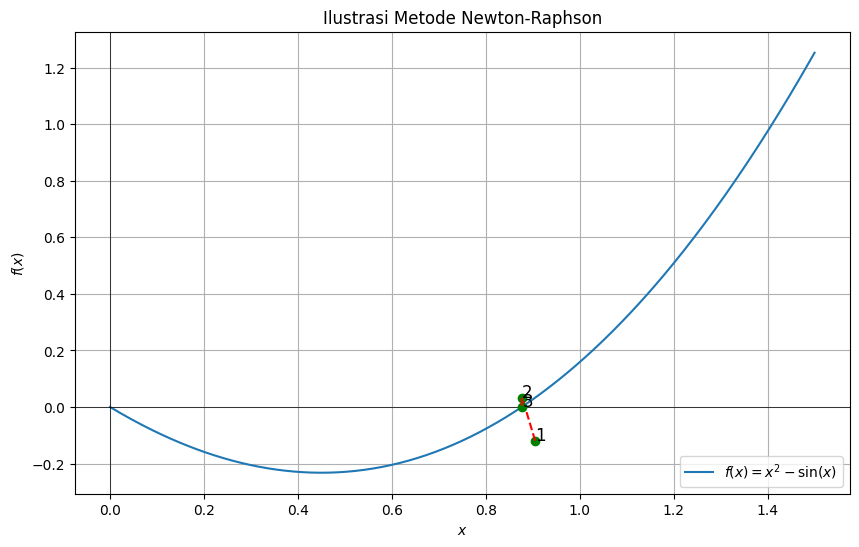

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang akan dicari akarnya dan turunannya
def f(x):
    return x**2 - np.sin(x)

def df(x):
    return 2*x - np.cos(x)

# Parameter
x0 = 0.75
tol = 1e-2
max_iter = 100

# List untuk menyimpan nilai-nilai x dan f(x) pada setiap iterasi
iterations = []

# Implementasi metode Newton-Raphson dengan menyimpan setiap iterasi
x = x0
for i in range(max_iter):
    fx = f(x)
    if abs(fx) < tol:
        iterations.append((x, fx))
        break
    dfx = df(x)
    if dfx == 0:
        raise ValueError("Turunan fungsi adalah nol. Metode Newton-Raphson tidak dapat konvergen.")
    x = x - fx / dfx
    iterations.append((x, fx))

# Plot fungsi
x_vals = np.linspace(0, 1.5, 400)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - \sin(x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plot iterasi metode Newton-Raphson
for i, (x, fx) in enumerate(iterations):
    plt.plot(x, fx, 'go')
    plt.text(x, fx, f'{i+1}', fontsize=12)
    if i > 0:
        prev_x, prev_fx = iterations[i-1]
        plt.plot([prev_x, x], [prev_fx, fx], 'r--')

plt.title('Ilustrasi Metode Newton-Raphson')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


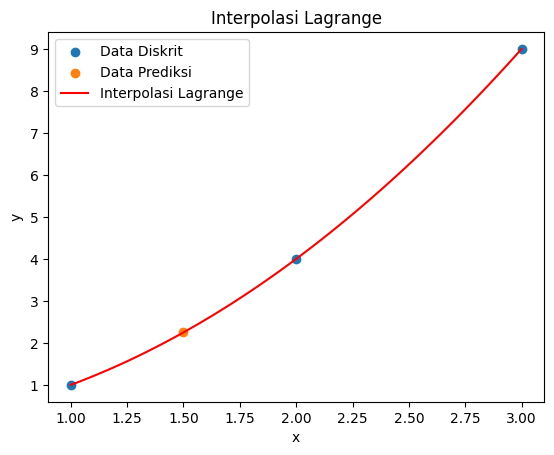

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_new):
    def basis_polynomial(i, x_point):
        terms = [(x_point - x[j]) / (x[i] - x[j]) for j in range(len(x)) if j != i]
        return np.prod(terms, axis=0)

    P_x_new = np.sum([y[i] * basis_polynomial(i, x_new) for i in range(len(x))], axis=0)
    return P_x_new

# Data diskrit
x = np.array([1, 2, 3])
y = np.array([1, 4, 9])
pred_x = []
pred_y = []

# Titik baru untuk evaluasi interpolasi
x_new = np.linspace(1, 3, 100)
y_new = lagrange_interpolation(x, y, x_new)
x_pred = 1.5 #Dapat diganti dengan suatu bilangan riil antara batas bawah dan batas atas dari x
y_pred = lagrange_interpolation(x, y, x_pred)
pred_x.append(x_pred)
pred_y.append(y_pred)
# Plot
plt.scatter(x, y, label='Data Diskrit')
plt.scatter(pred_x, pred_y, label='Data Prediksi')
plt.plot(x_new, y_new, label='Interpolasi Lagrange', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Lagrange')
plt.show()

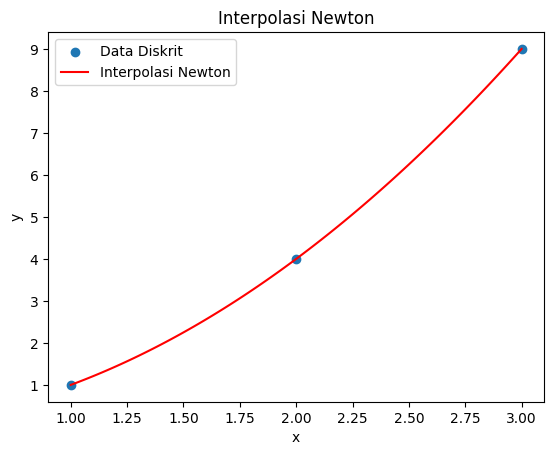

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def divided_differences(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0,:]

def newton_polynomial(x, x_data, coef):
    n = len(coef)
    p = coef[0]
    for k in range(1,n):
        term = coef[k]
        for j in range(k):
            term = term * (x - x_data[j])
        p = p + term
    return p

# Data diskrit
x_data = np.array([1, 2, 3])
y_data = np.array([1, 4, 9])

# Hitung koefisien polinomial Newton
coef = divided_differences(x_data, y_data)

# Titik baru untuk evaluasi interpolasi
x_new = np.linspace(1, 3, 100)
y_new = newton_polynomial(x_new, x_data, coef)

# Plot
plt.scatter(x_data, y_data, label='Data Diskrit')
plt.plot(x_new, y_new, label='Interpolasi Newton', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Newton')
plt.show()

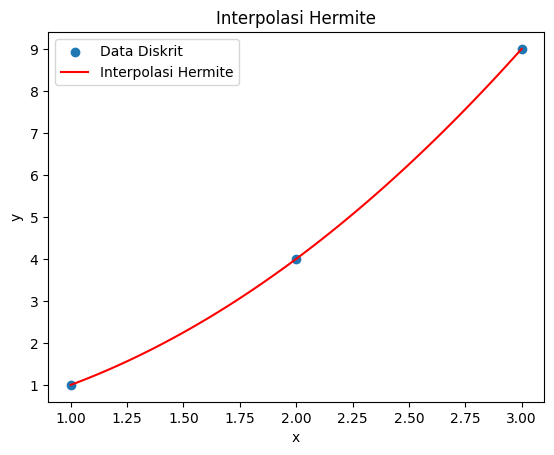

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hermite_basis(x, xk, fk, d_fk):
    n = len(xk)
    h = np.zeros((n, n))
    for i in range(n):
        h[i, 0] = fk[i]
    for i in range(1, n):
        for j in range(n - i):
            if i == 1:
                h[j, i] = (h[j + 1, i - 1] - h[j, i - 1]) / (xk[j + i] - xk[j])
            else:
                h[j, i] = ((h[j + 1, i - 1] - h[j, i - 1]) / (xk[j + i] - xk[j]))
    coef = h[0, :]
    return coef

def hermite_polynomial(x, xk, fk, d_fk, coef):
    n = len(xk)
    Hx = np.zeros_like(x)
    for i in range(n):
        prod = np.ones_like(x)
        for j in range(i):
            prod *= (x - xk[j])
        Hx += coef[i] * prod
    return Hx

# Data diskrit
xk = np.array([1, 2, 3])
fk = np.array([1, 4, 9])
d_fk = np.array([1, 1, 1])

# Hitung koefisien polinomial Hermite
coef = hermite_basis(xk, xk, fk, d_fk)

# Titik baru untuk evaluasi interpolasi
x_new = np.linspace(1, 3, 100)
y_new = hermite_polynomial(x_new, xk, fk, d_fk, coef)

# Plot
plt.scatter(xk, fk, label='Data Diskrit')
plt.plot(x_new, y_new, label='Interpolasi Hermite', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolasi Hermite')
plt.show()


In [ ]:
def f(x):
    # Definisikan fungsi yang ingin diintegrasikan
    return sin(x)

def simpson(f, a, b):
        c = (a + b) / 2.0
        h3 = abs(b - a) / 6.0
        return h3 * (f(a) + 4.0 * f(c) + f(b))
print(simpson(f,0,pi))

2.0943951023931953
